#Imports and data loading

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# full dataset view
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode, plot
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

#1. Preparation and analysis of chosen data

#About dataset

https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification/data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

In [2]:
''' Read in the whole dataset '''
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_deposit.csv");
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_deposit.csv");

# df = pd.concat([df_train, df_test], sort=False)

In [3]:
# df.head()
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df_train.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [8]:
df_test.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [9]:
df_train.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [10]:
df_test.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [11]:
df_train.shape

(45211, 17)

In [12]:
df_test.shape

(4521, 17)

In [13]:
df_train['y'].unique(), df_test['y'].unique()

(array(['no', 'yes'], dtype=object), array(['no', 'yes'], dtype=object))

In [14]:
df_train.job.unique(), df_test.job.unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object))

In [15]:
df_train.education.unique(), df_test.education.unique()

(array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object))

In [16]:
''' Get duplicates number '''
df_train.duplicated().sum(), df_test.duplicated().sum()

(np.int64(0), np.int64(0))

In [ ]:
# df.drop_duplicates(inplace=True)
# print(df.duplicated().sum())
# df.shape

0


(45211, 17)

#The description of columns:

1 - **age** (numeric)

2 - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - **education** (categorical: "unknown","secondary","primary","tertiary")


5 - **default**: has credit in default? (binary: "yes","no")

6 - **balance**: average yearly balance, in euros (numeric)

7 - **housing**: has housing loan? (binary: "yes","no")

8 - **loan**: has personal loan? (binary: "yes","no")

9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular")

10 - **day**: last contact day of the month (numeric)

11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - **duration**: last contact duration, in seconds (numeric)

13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - **previous**: number of contacts performed before this campaign and for this client (numeric)

16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

.

17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")



#2. Input and Output

**Input**: "age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "poutcome","previous"


**Output**: "y"

#3. Dependence of input/output

In [17]:
df_train.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5  unknown    5   may       139         1     -1         0  unknown  no  
6  unknown    5   may       217         1     -1         0  unknown  no  
7  unknown    5   may       380         1     -1         0  unknown  no  
8  unknown    5   may        50         1     -1         0  unknown  no  
9  unknown    5   may        55         1     -1         0  unknown  no

In [18]:
df_test.head(10)

age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

Lets take a look at object columns

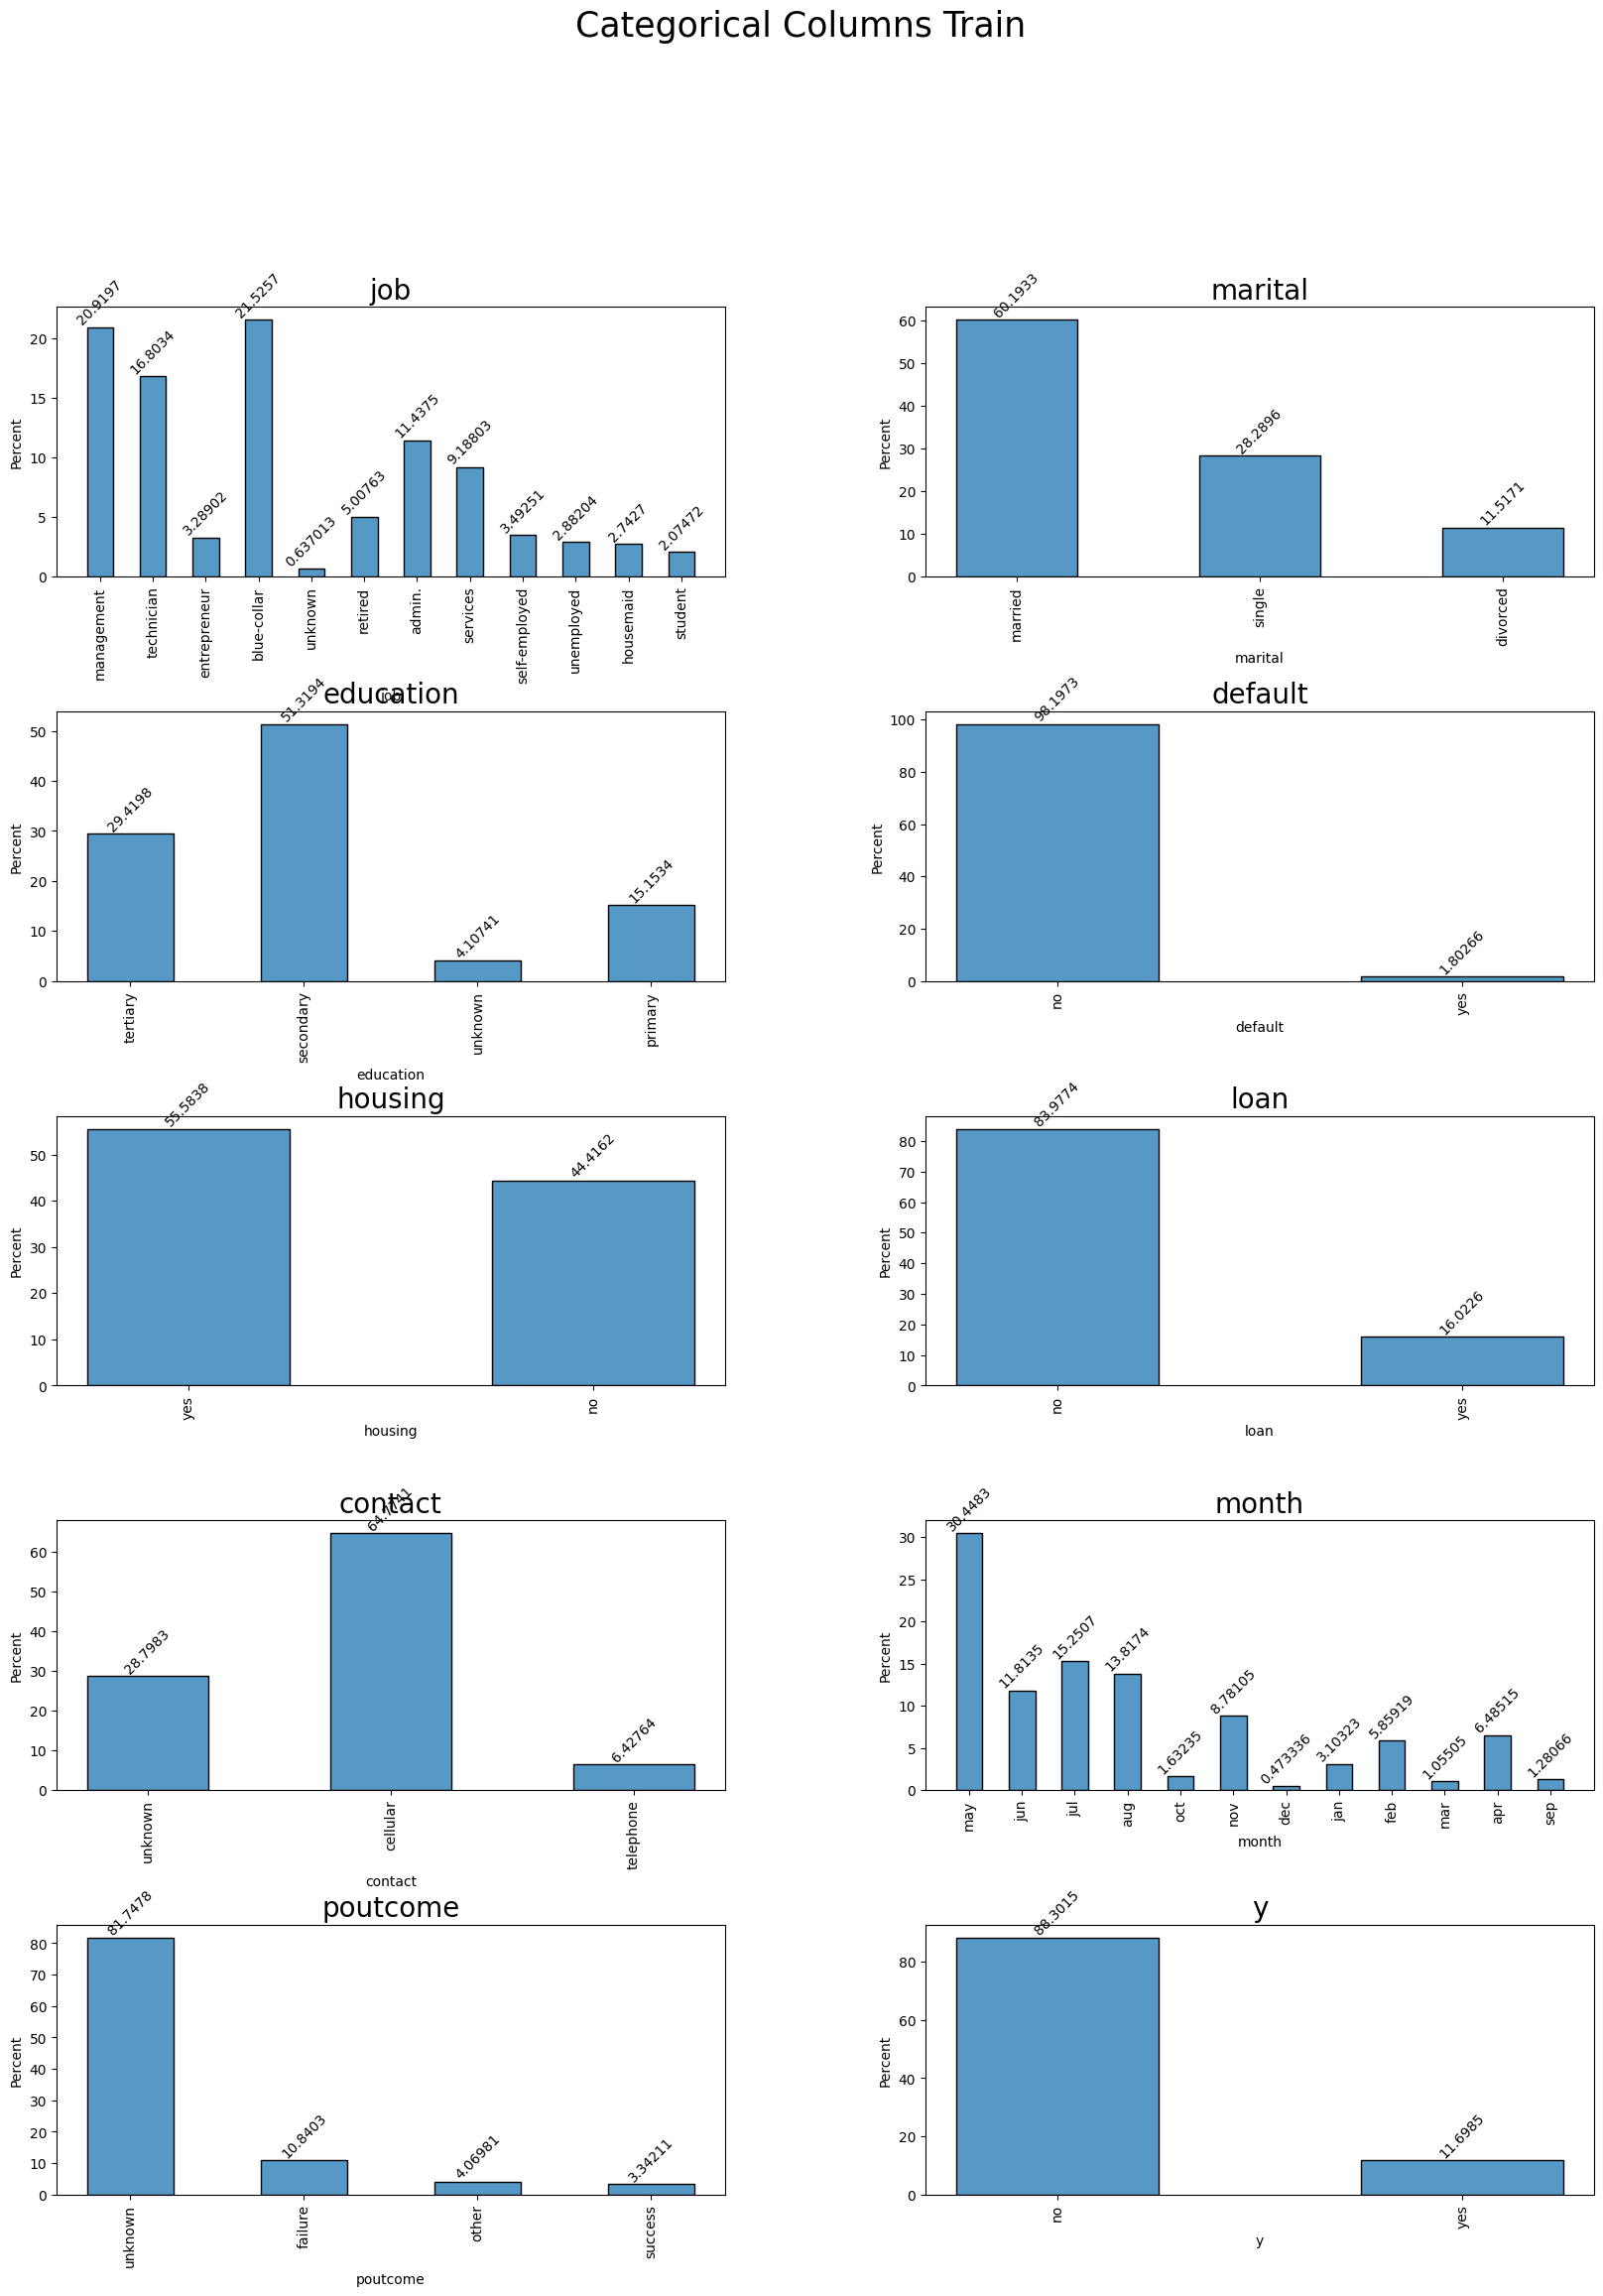

In [19]:
cat_cols = df_train.select_dtypes(include="object").columns

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

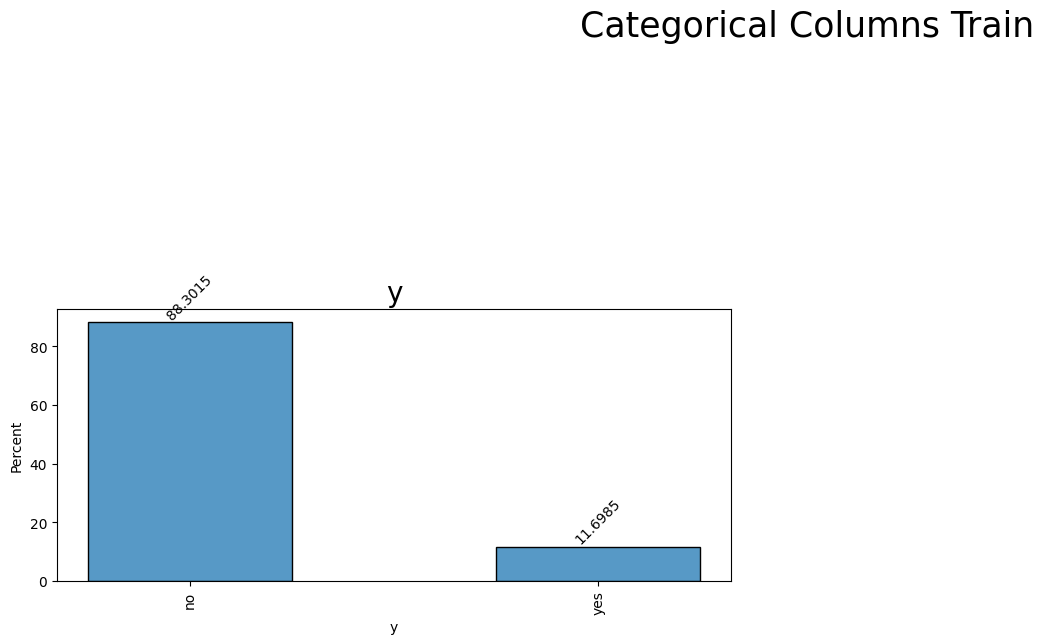

In [20]:
cat_cols = df_train.select_dtypes(include="object").columns

cols = ['y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

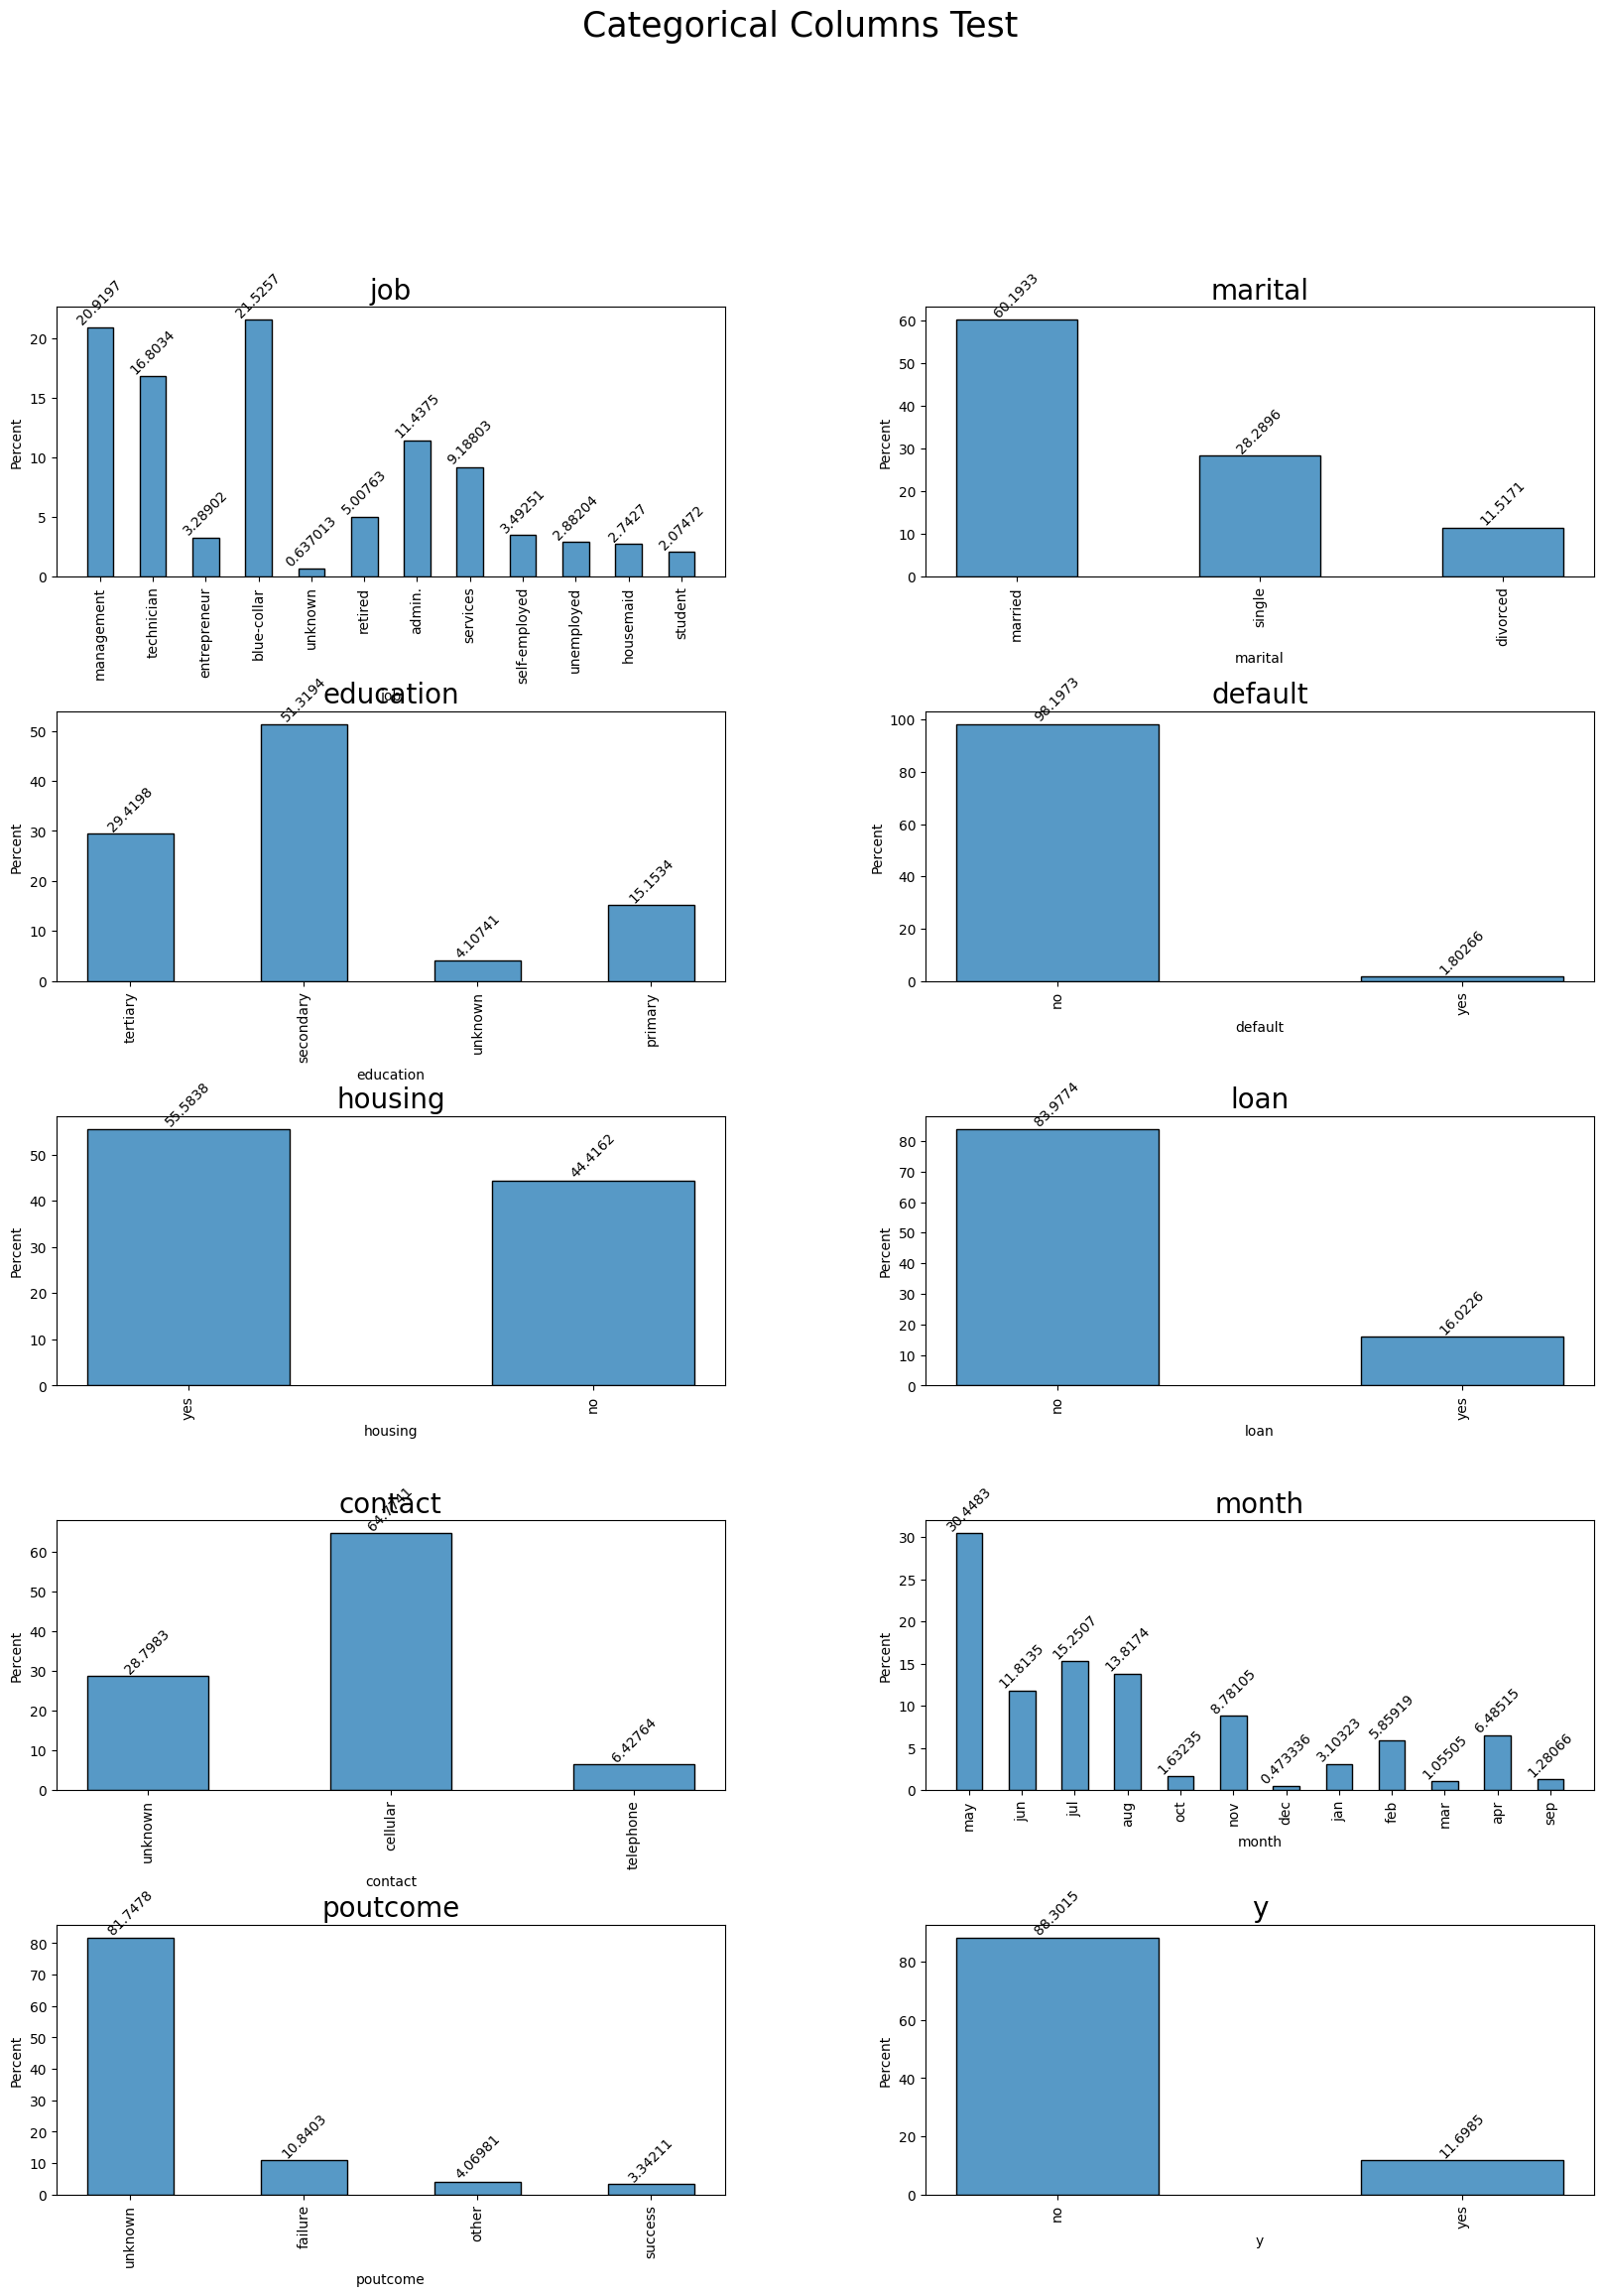

In [21]:
cat_cols = df_test.select_dtypes(include="object").columns

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

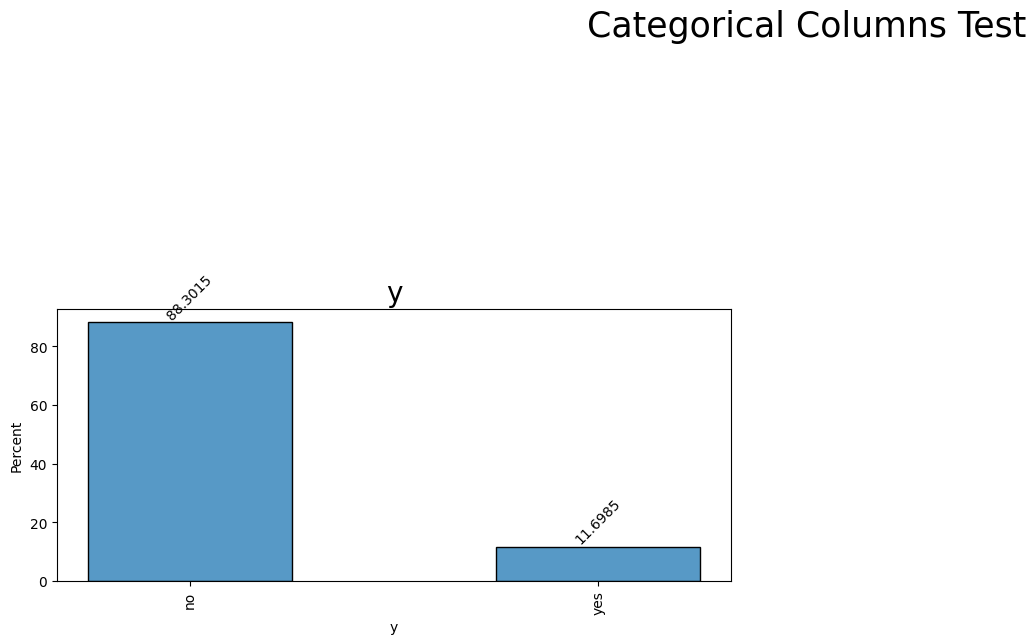

In [23]:
cat_cols = df_test.select_dtypes(include="object").columns

cols = ['y']
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Categorical Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(6, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent")

    for container in ax.containers:
        ax.bar_label(container, rotation=45)

    plt.xticks(rotation=90)

plt.show()

Now lets visualise numeric columns

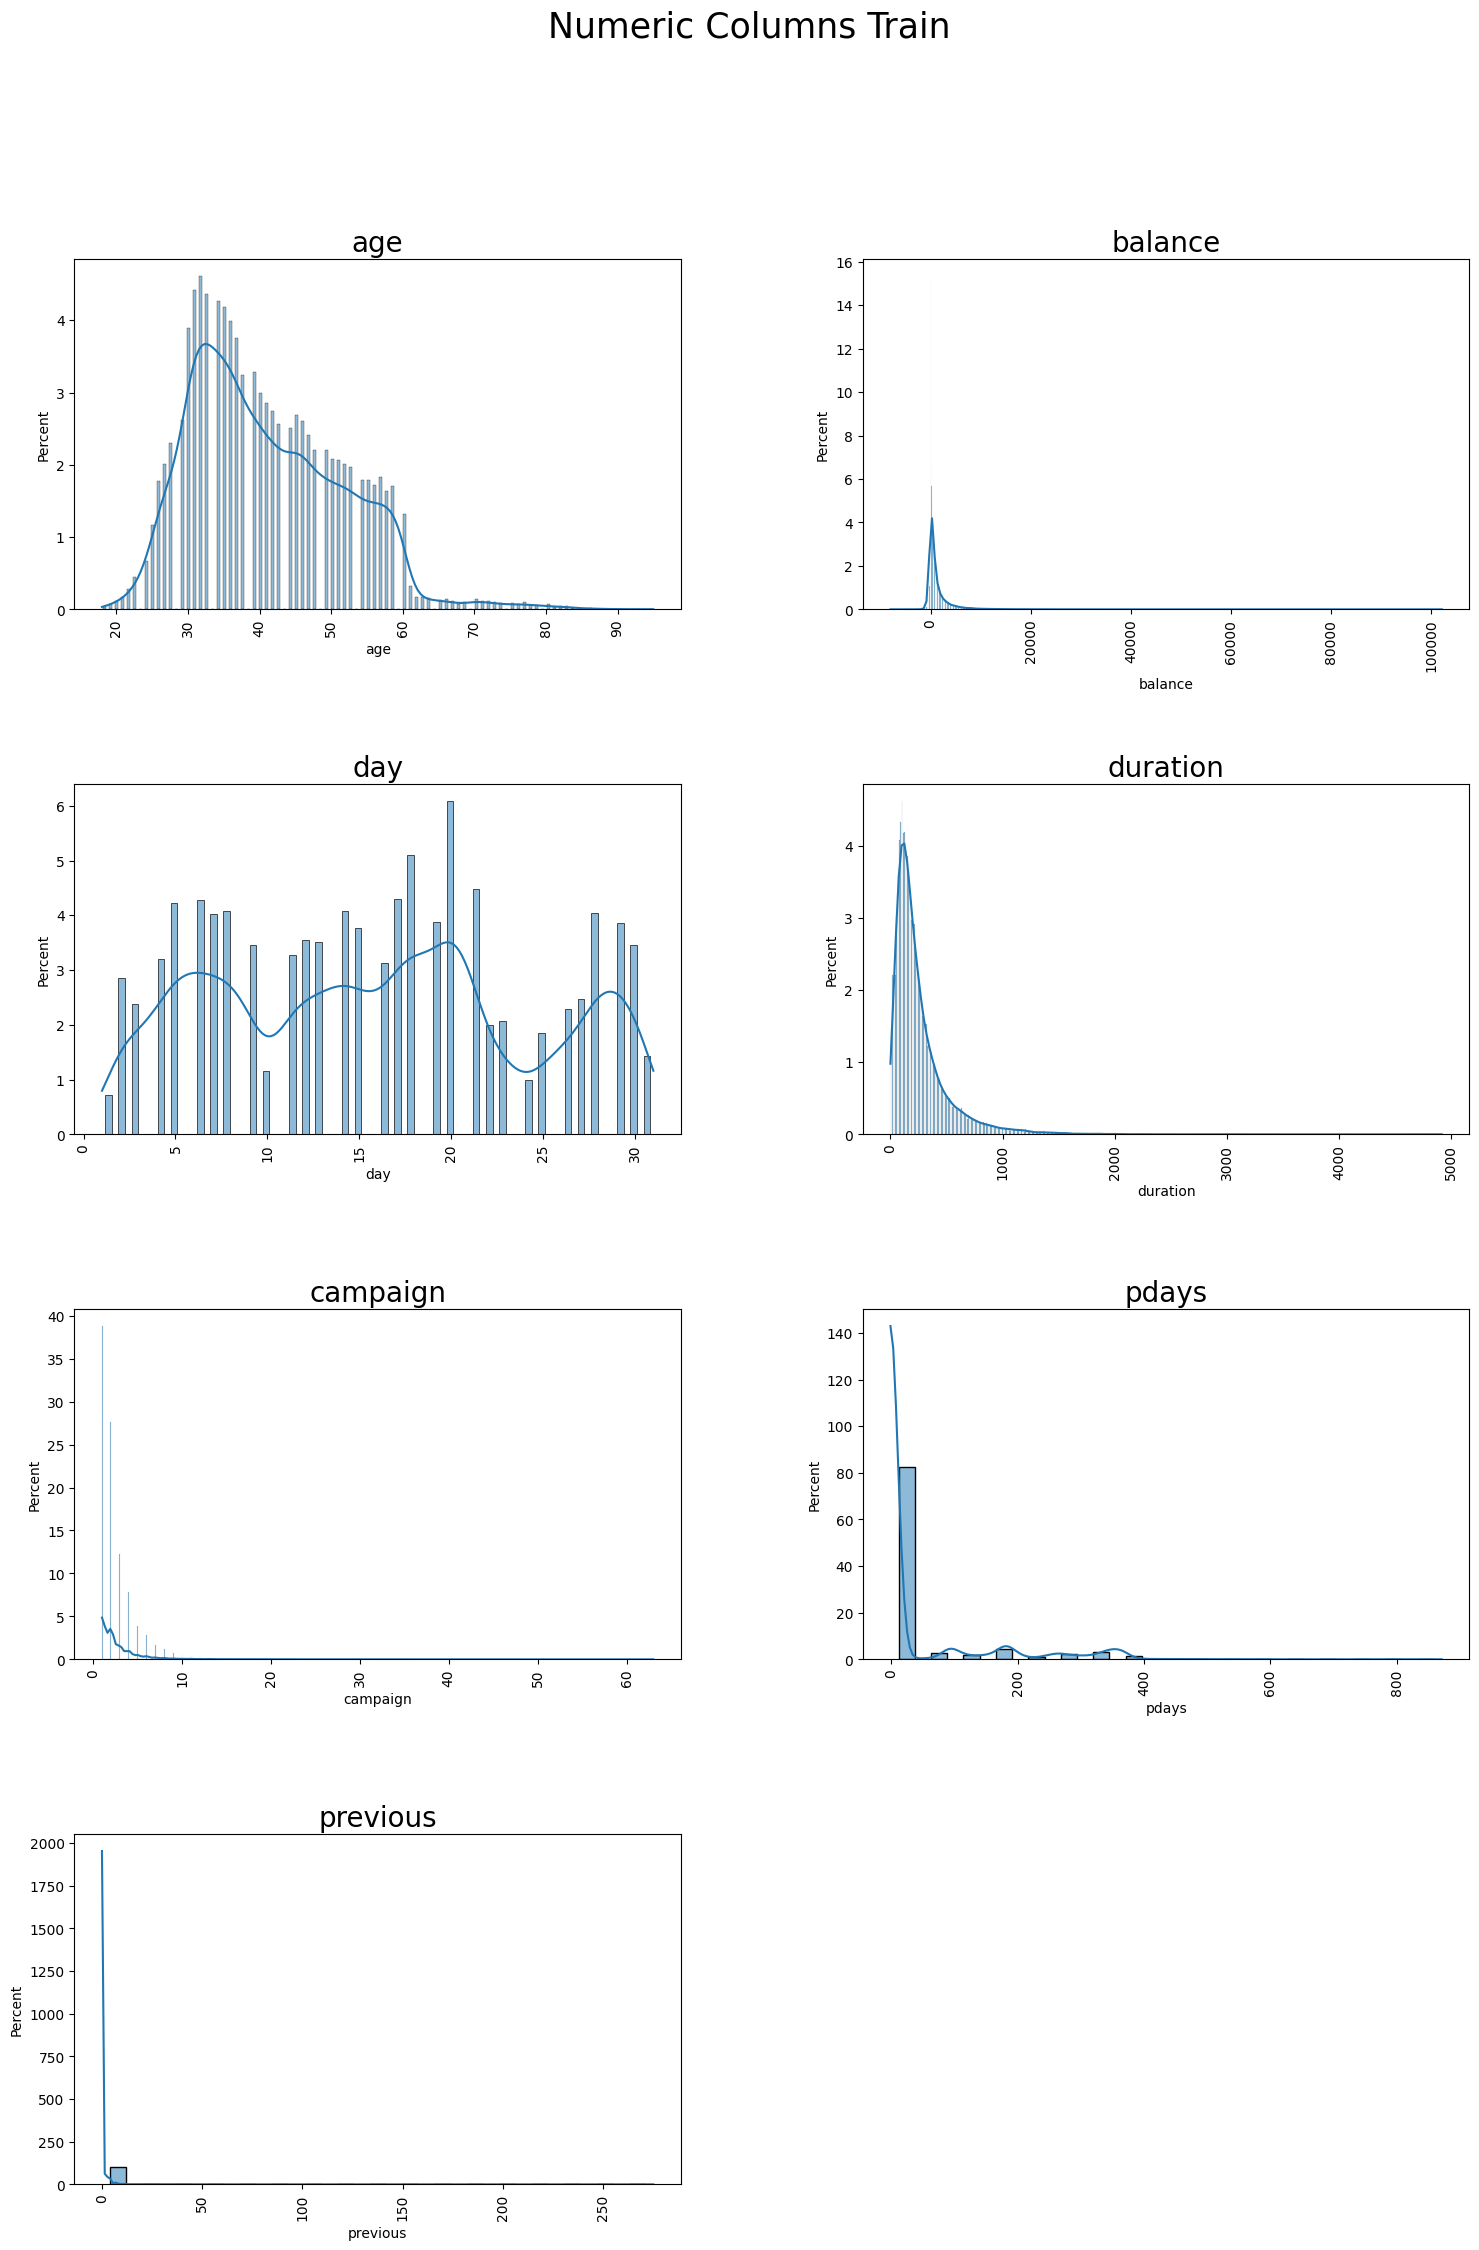

In [24]:
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Numeric Columns Train", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(4, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_train, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent", kde=True)

    plt.xticks(rotation=90)

plt.show()

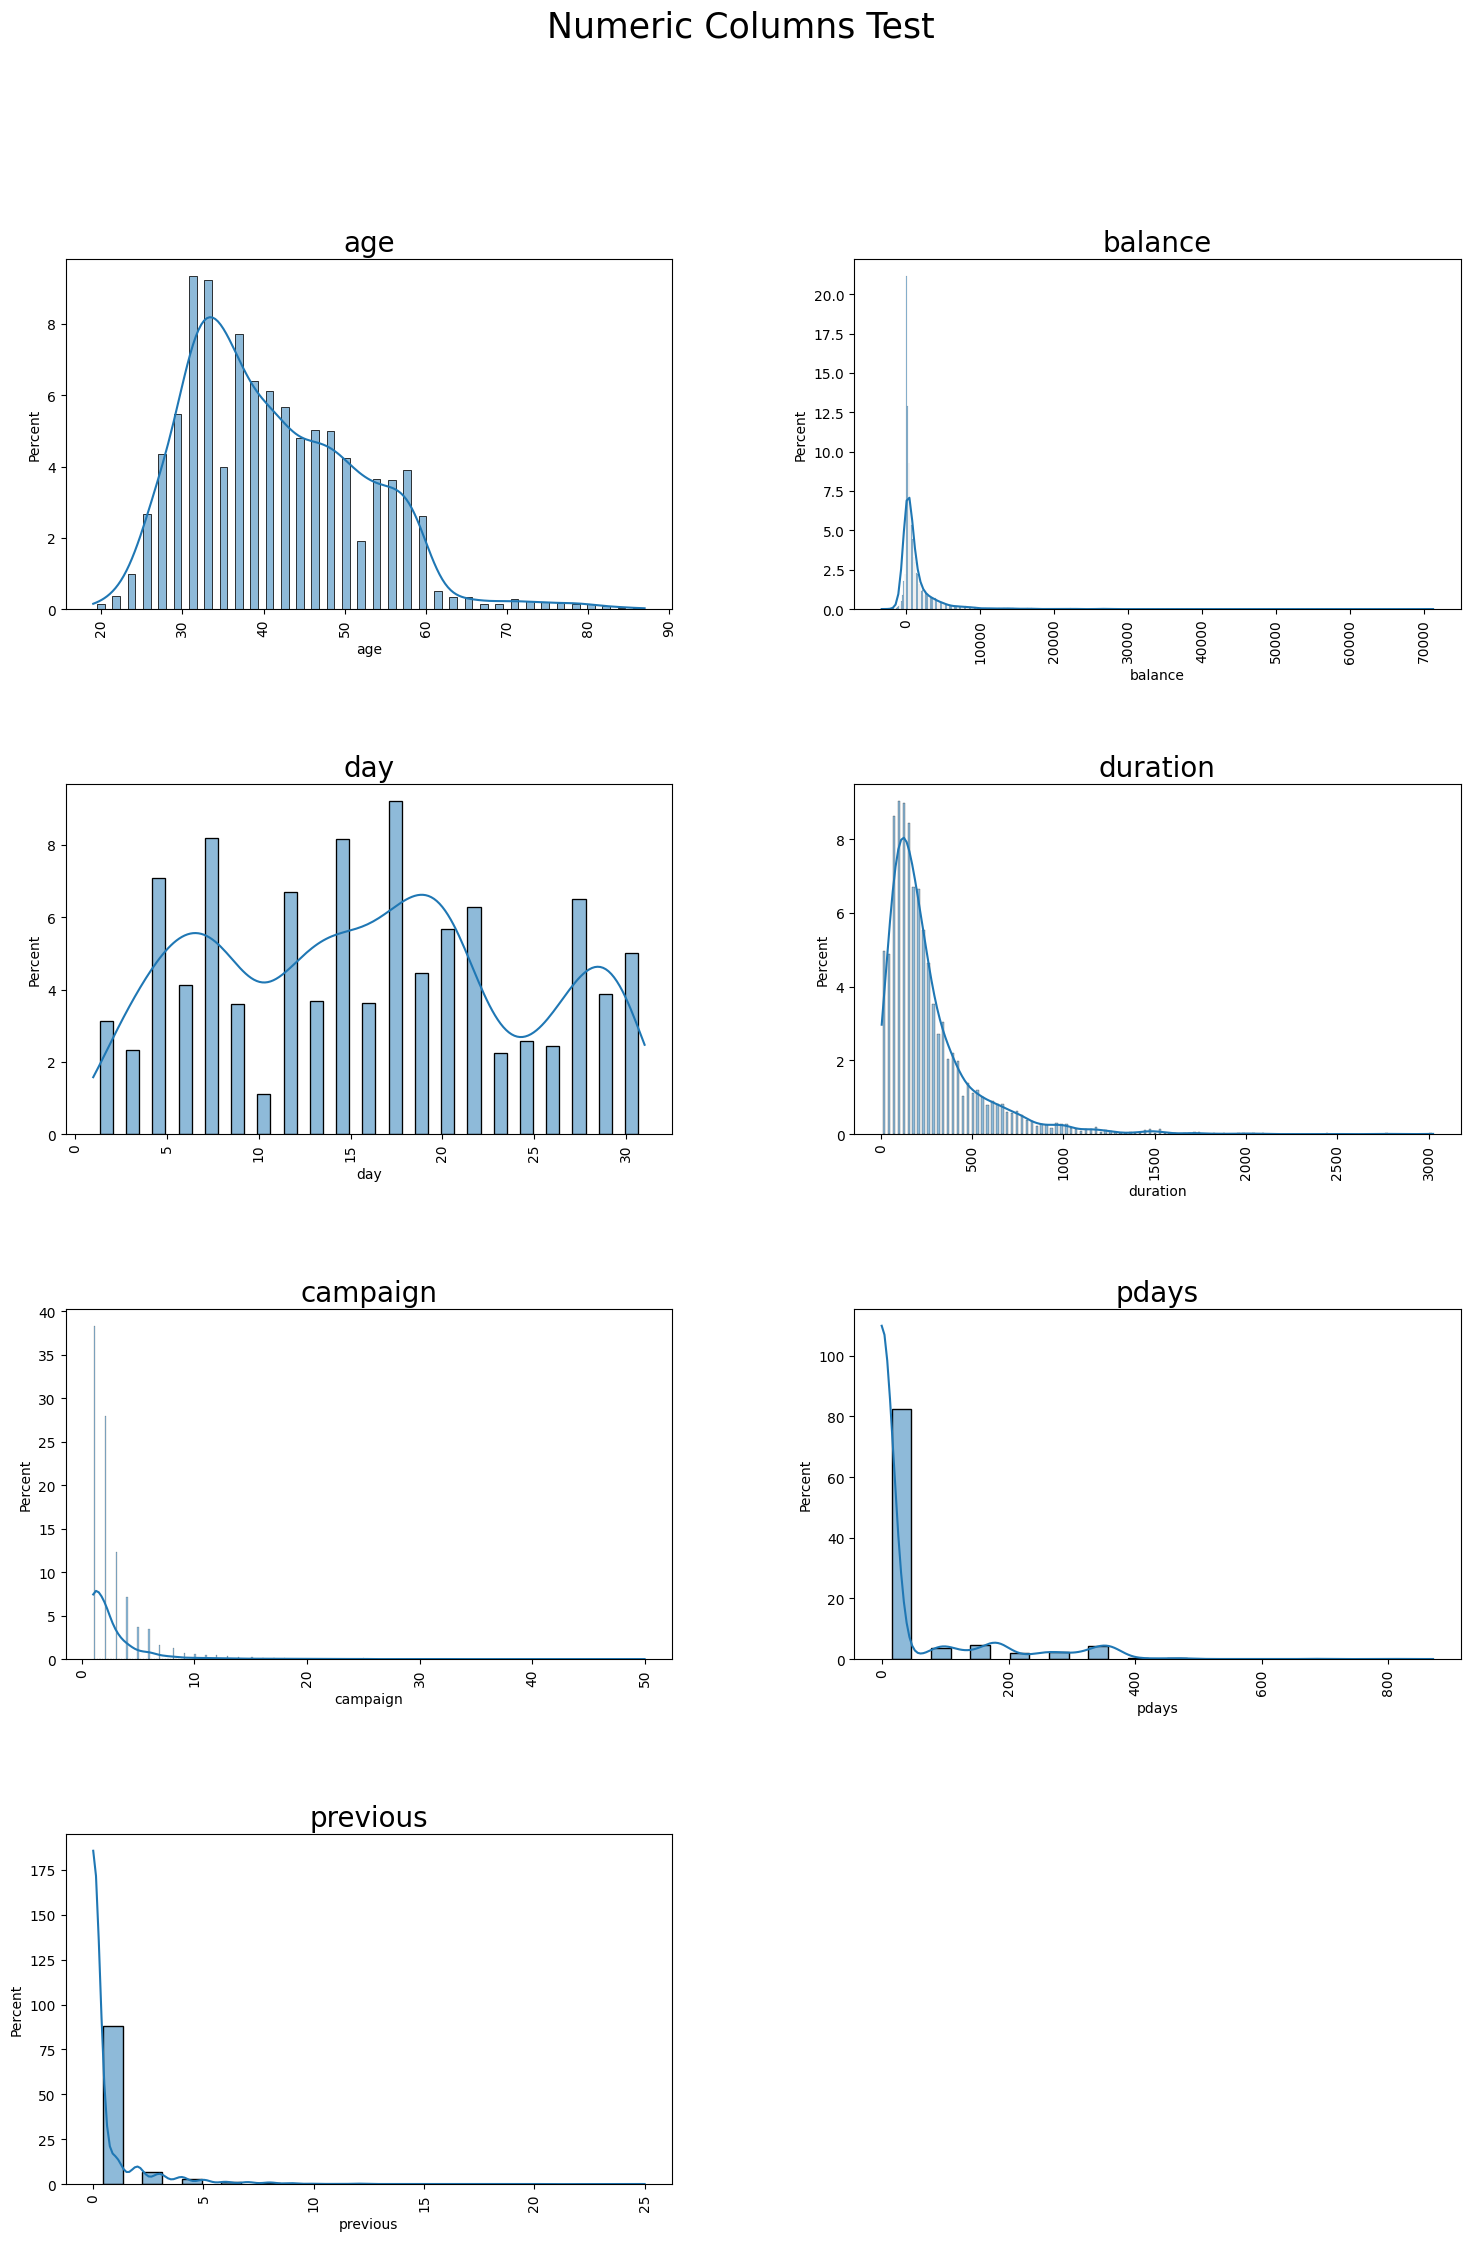

In [25]:
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)
plt.suptitle("Numeric Columns Test", fontsize=25)

for n, column in enumerate(cols):
    ax=plt.subplot(4, 2, n+1)
    ax.set_title(column, fontsize=20)

    sns.histplot(data=df_test, x=column, multiple="dodge", shrink=0.5, ax=ax, stat="percent", kde=True)

    plt.xticks(rotation=90)

plt.show()

In [26]:
label_encoder = LabelEncoder()
df_train['y'] = label_encoder.fit_transform(df_train['y'])
print(df_train.y.unique())

[0 1]


In [27]:
label_encoder = LabelEncoder()
df_test['y'] = label_encoder.fit_transform(df_test['y'])
print(df_test.y.unique())

[0 1]


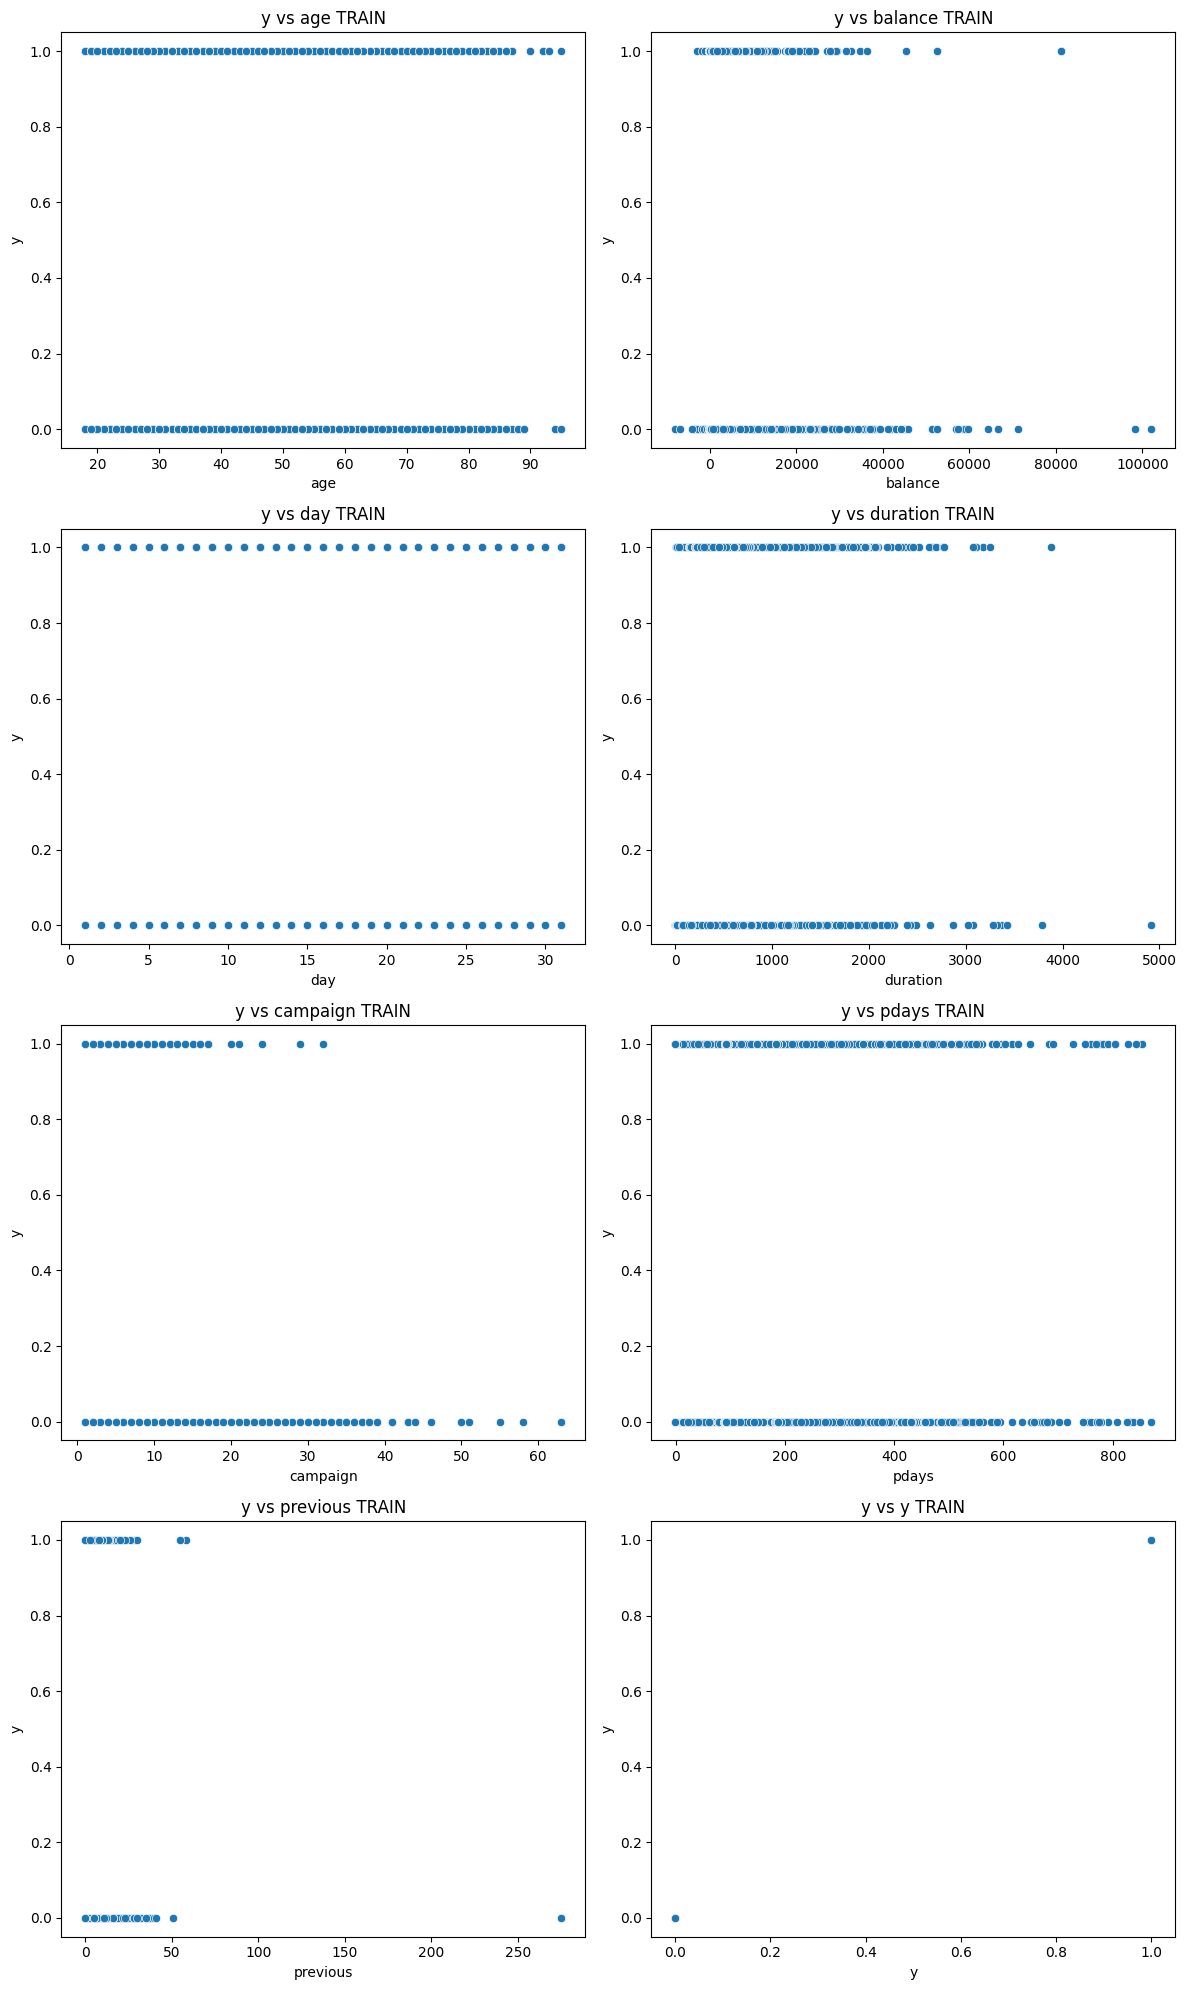

In [28]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.scatterplot(x=df_train[feature], y=df_train['y'])
    plt.title(f'y vs {feature} TRAIN')
    plt.xlabel(feature)
    plt.ylabel('y')

plt.tight_layout()
plt.show()

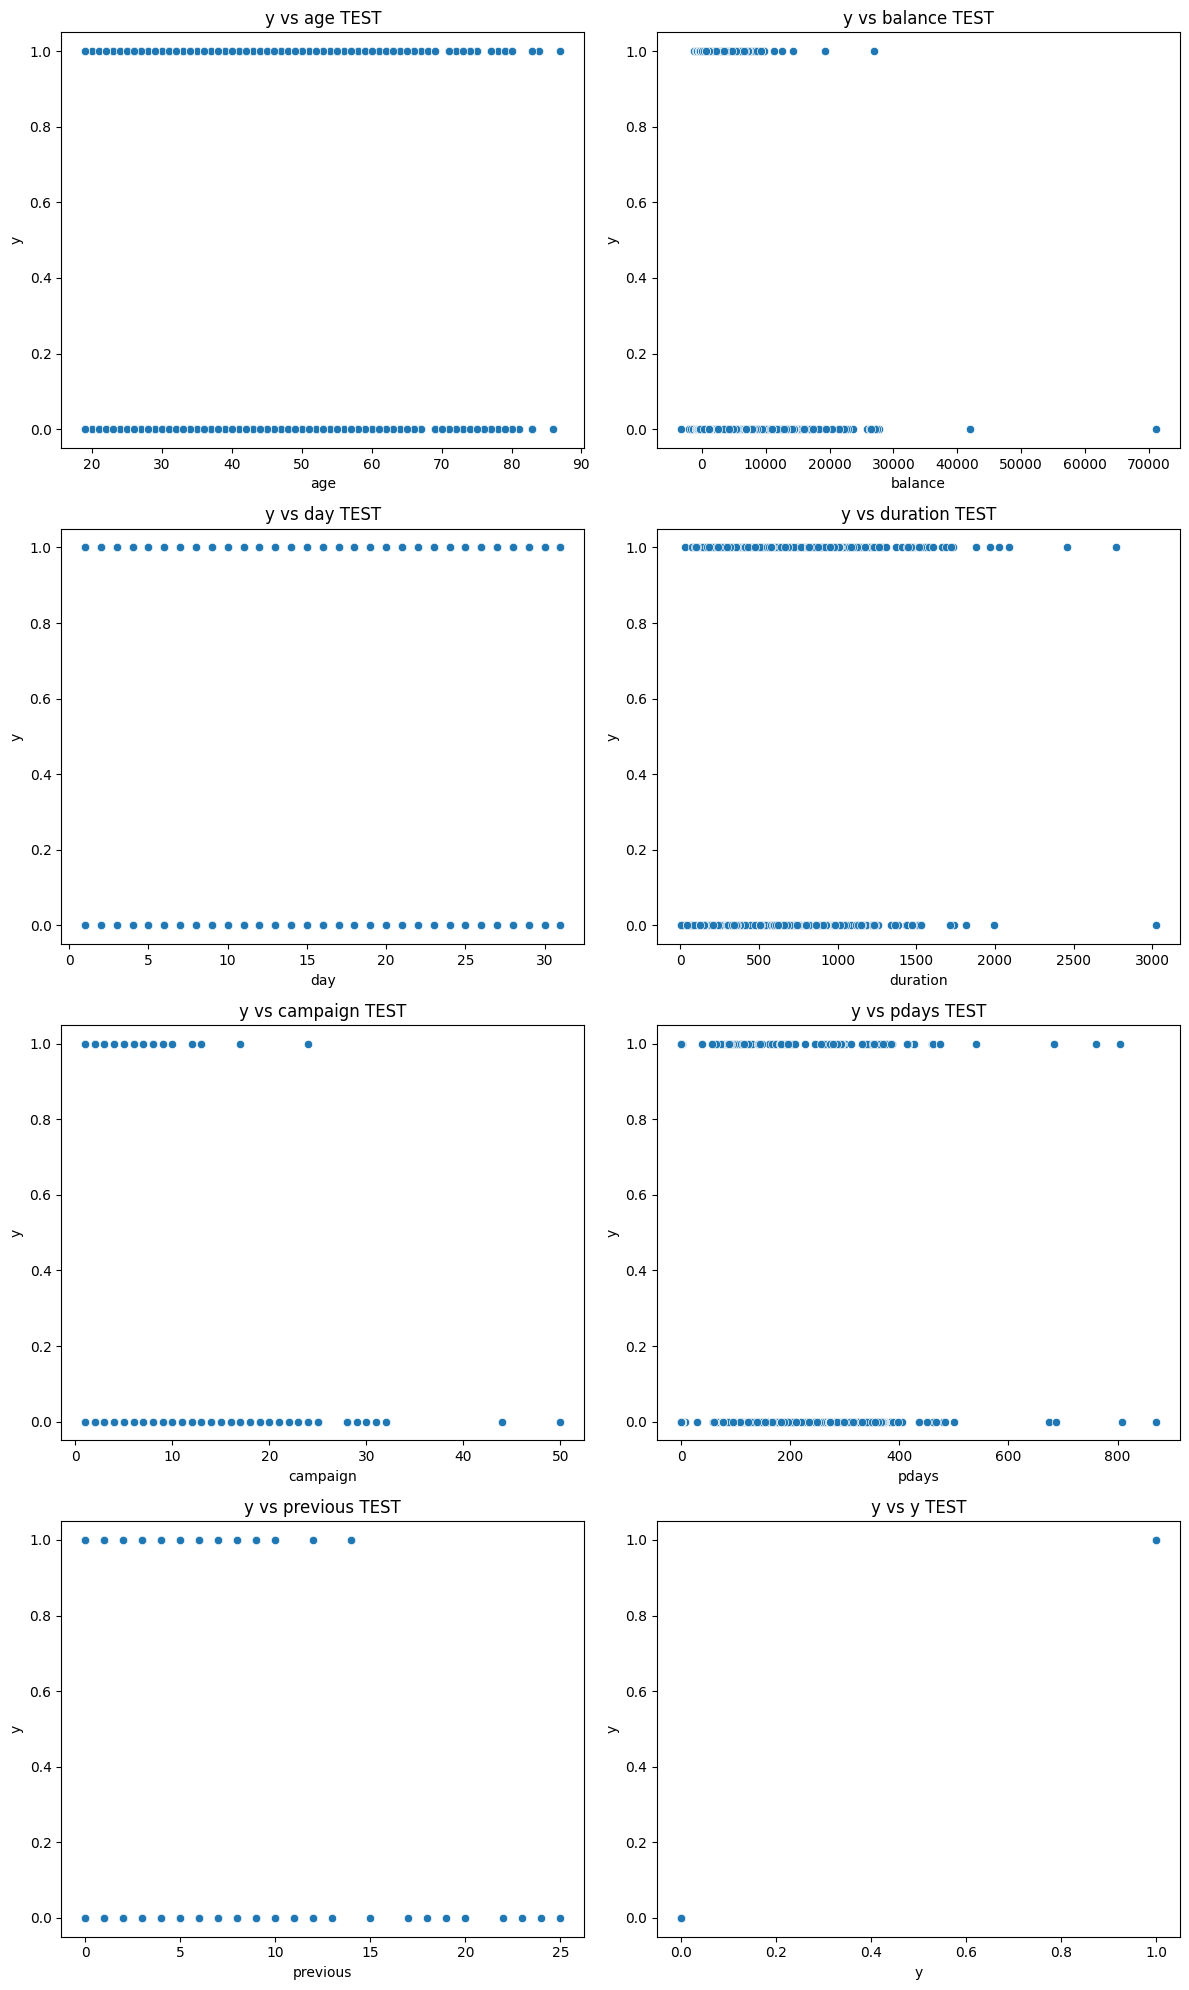

In [29]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))
for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.scatterplot(x=df_test[feature], y=df_test['y'])
    plt.title(f'y vs {feature} TEST')
    plt.xlabel(feature)
    plt.ylabel('y')

plt.tight_layout()
plt.show()

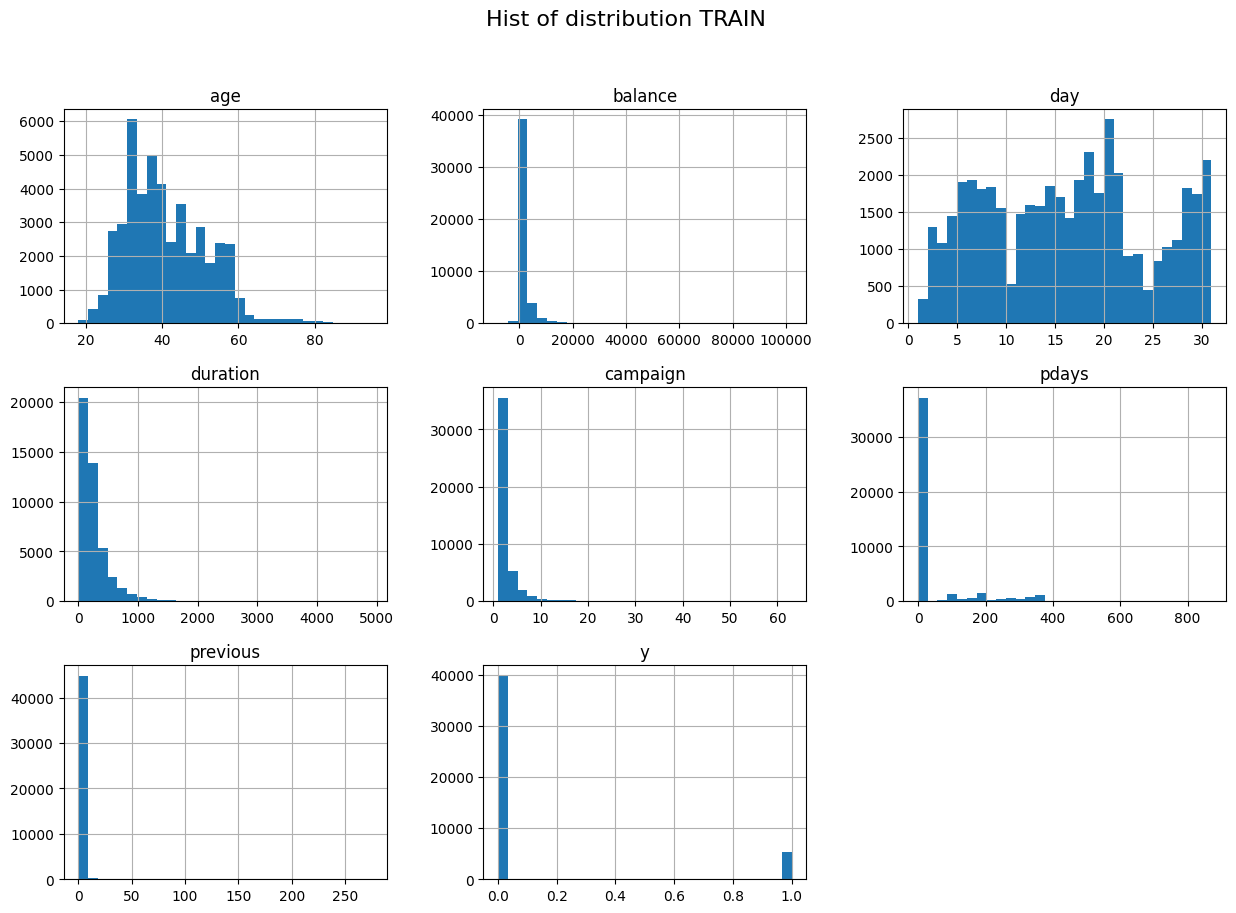

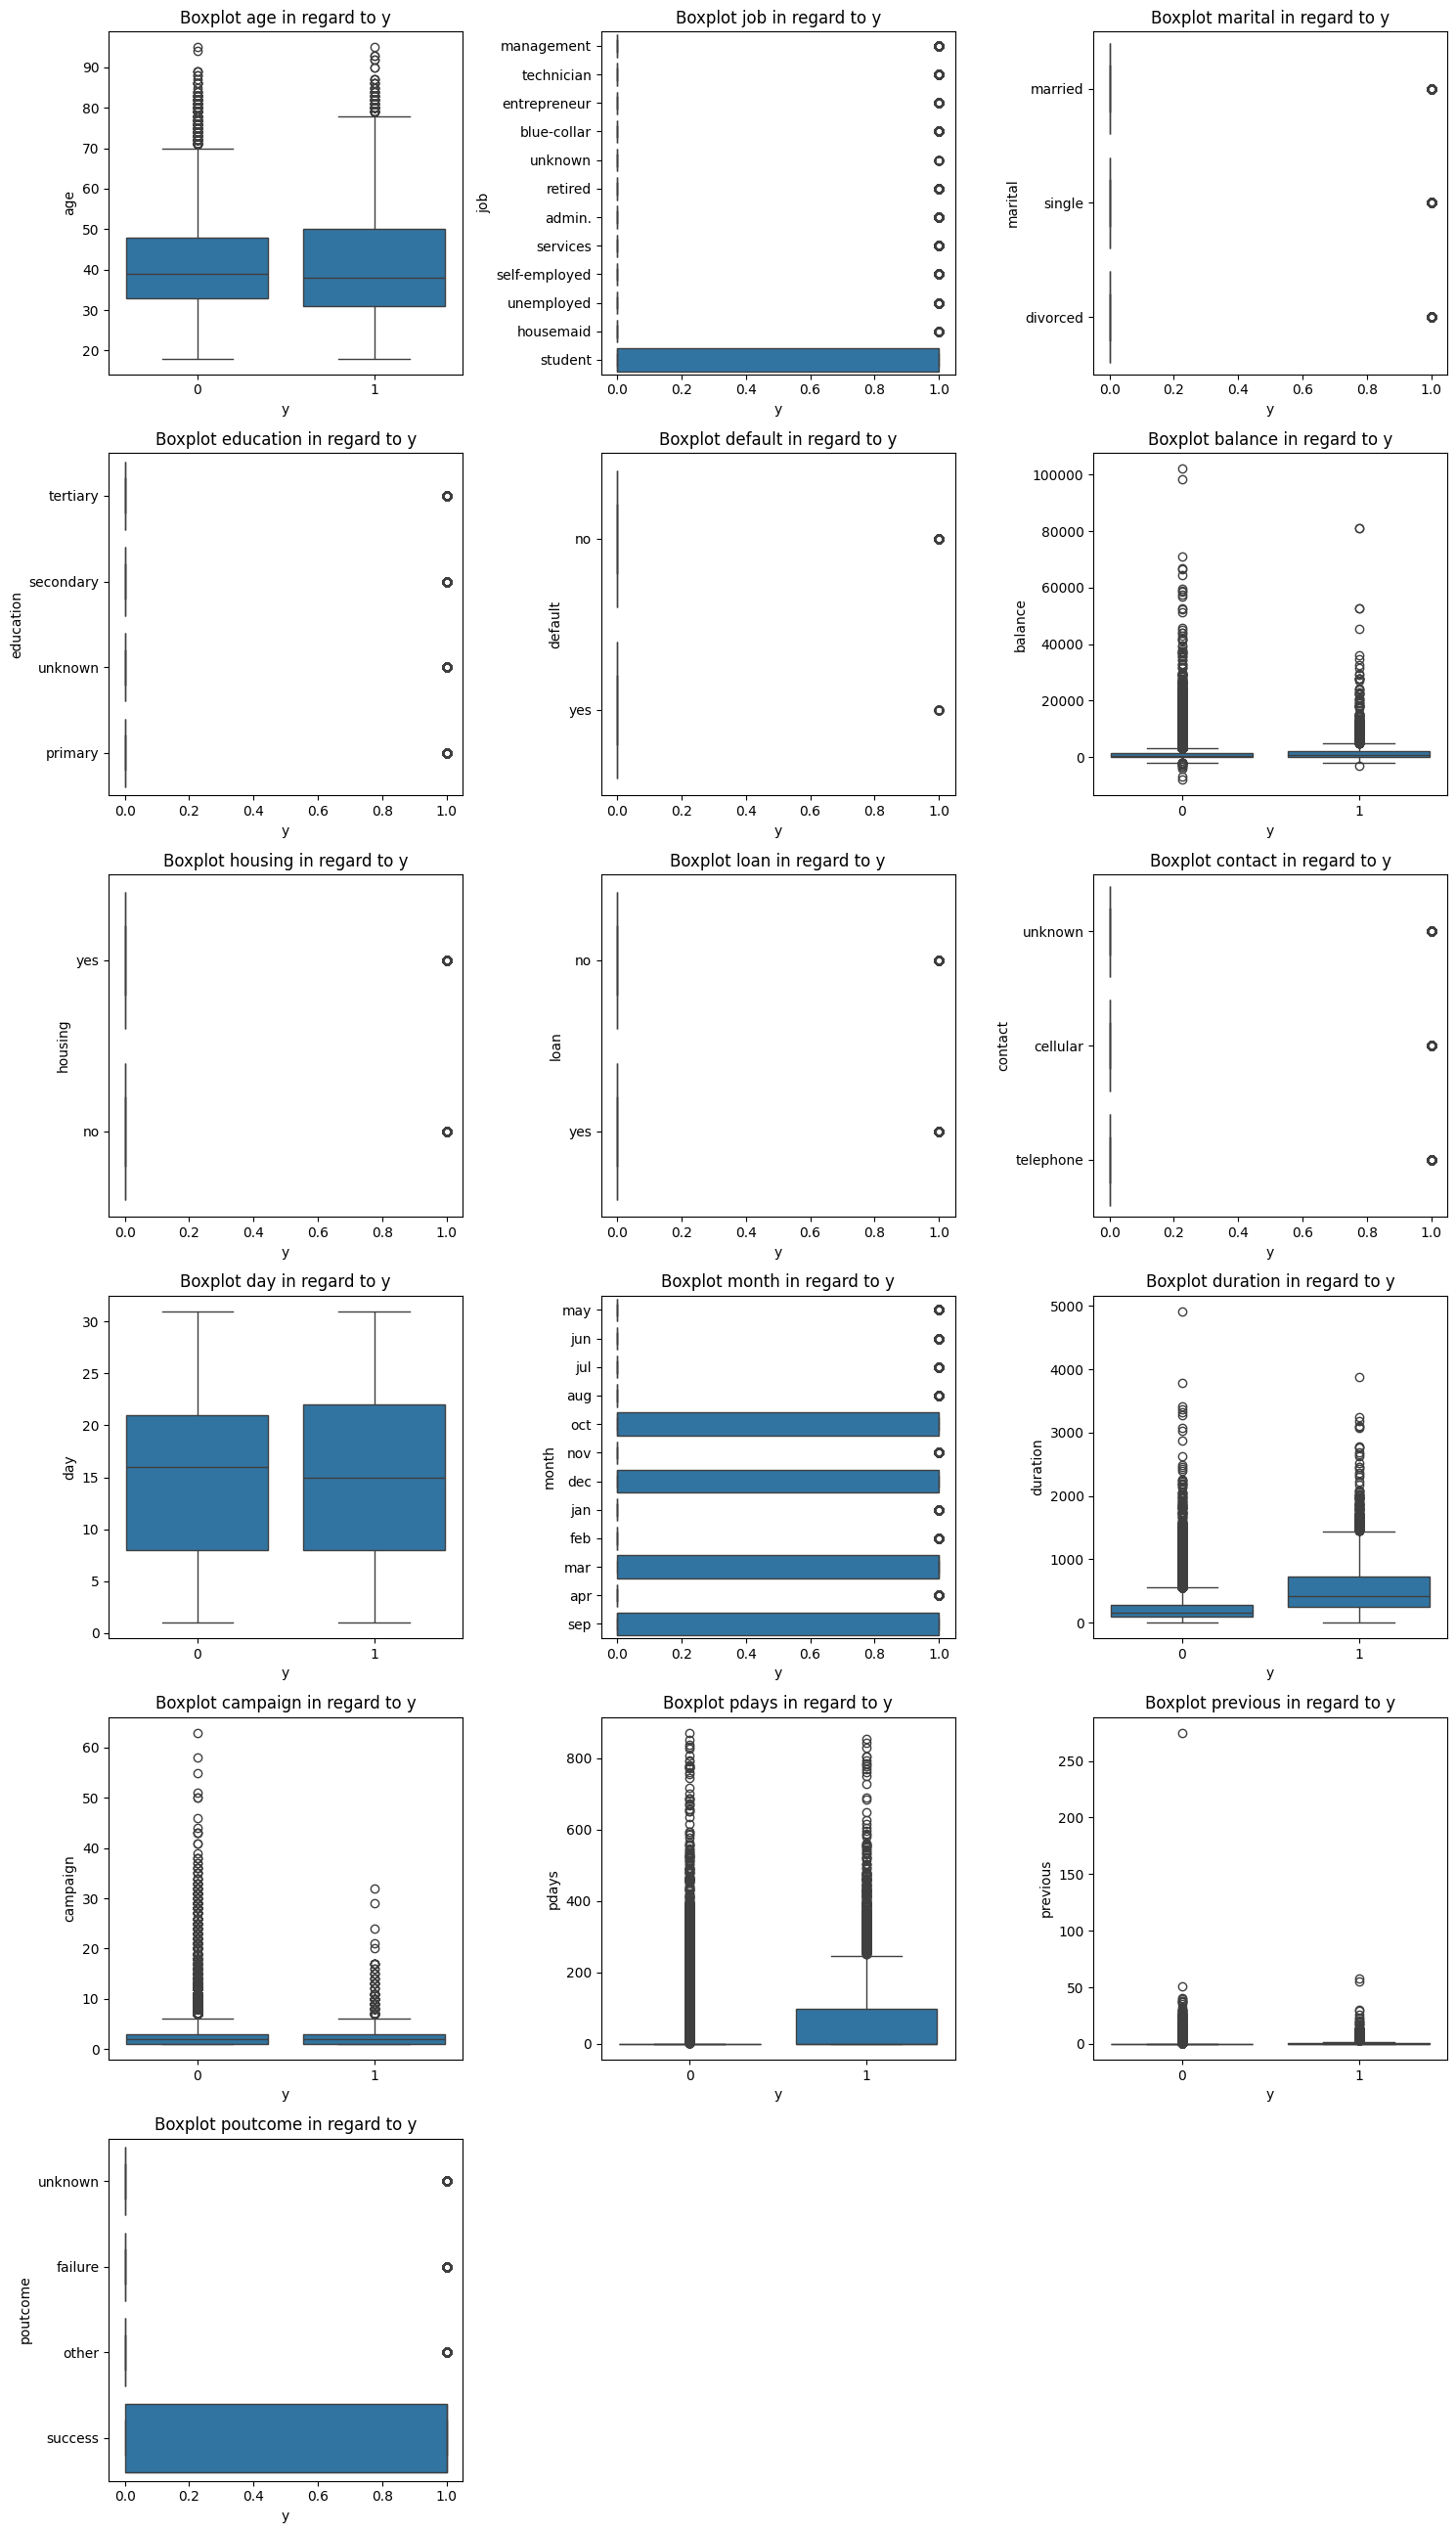

In [30]:
df_train.hist(bins=30, figsize=(15, 10))
plt.suptitle("Hist of distribution TRAIN", fontsize=16)
plt.show()

features = df_train.drop(columns=['y']).columns

plt.figure(figsize=(15, 5 * len(features) // 3))
for i, col in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.boxplot(x="y", y=col, data=df_train)
    plt.title(f"Boxplot {col} in regard to y")

plt.tight_layout()
plt.show()

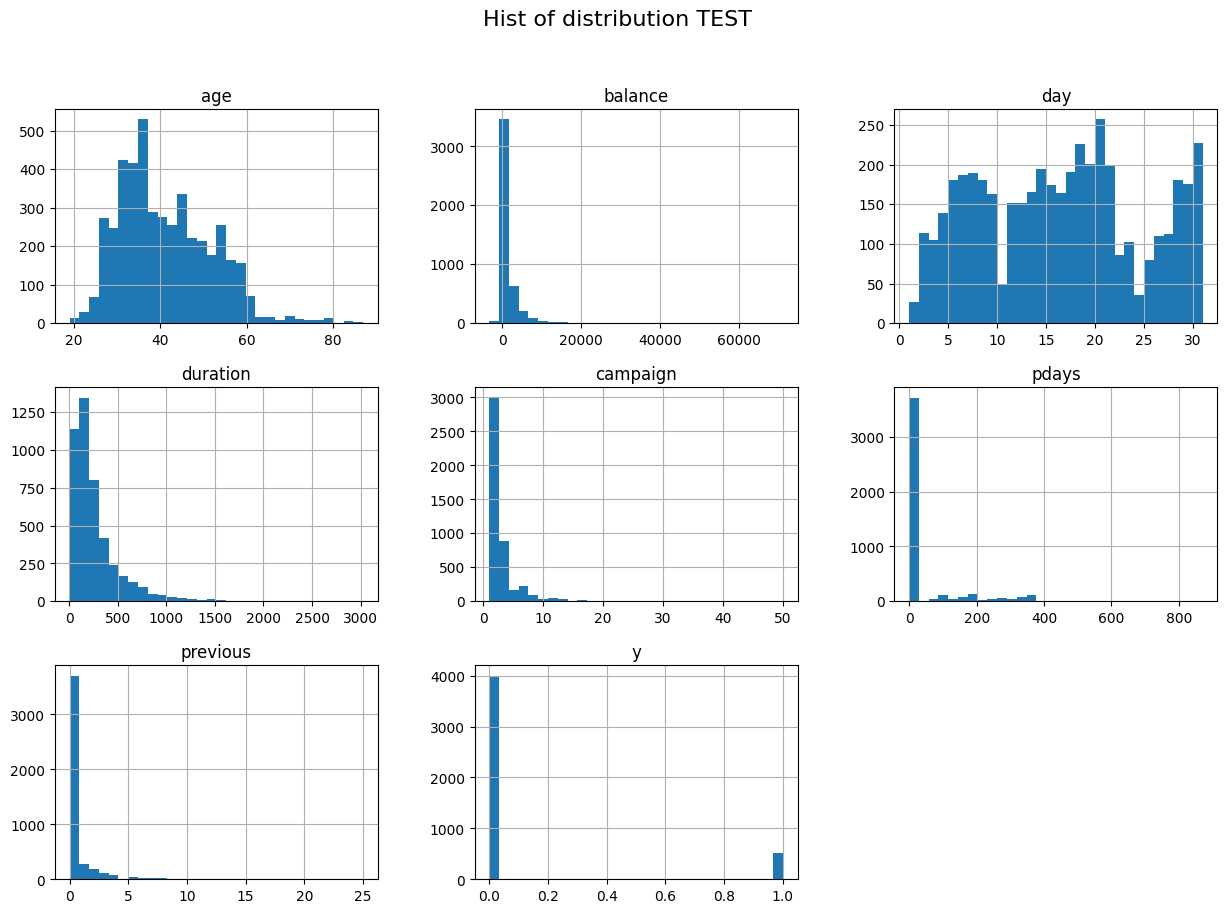

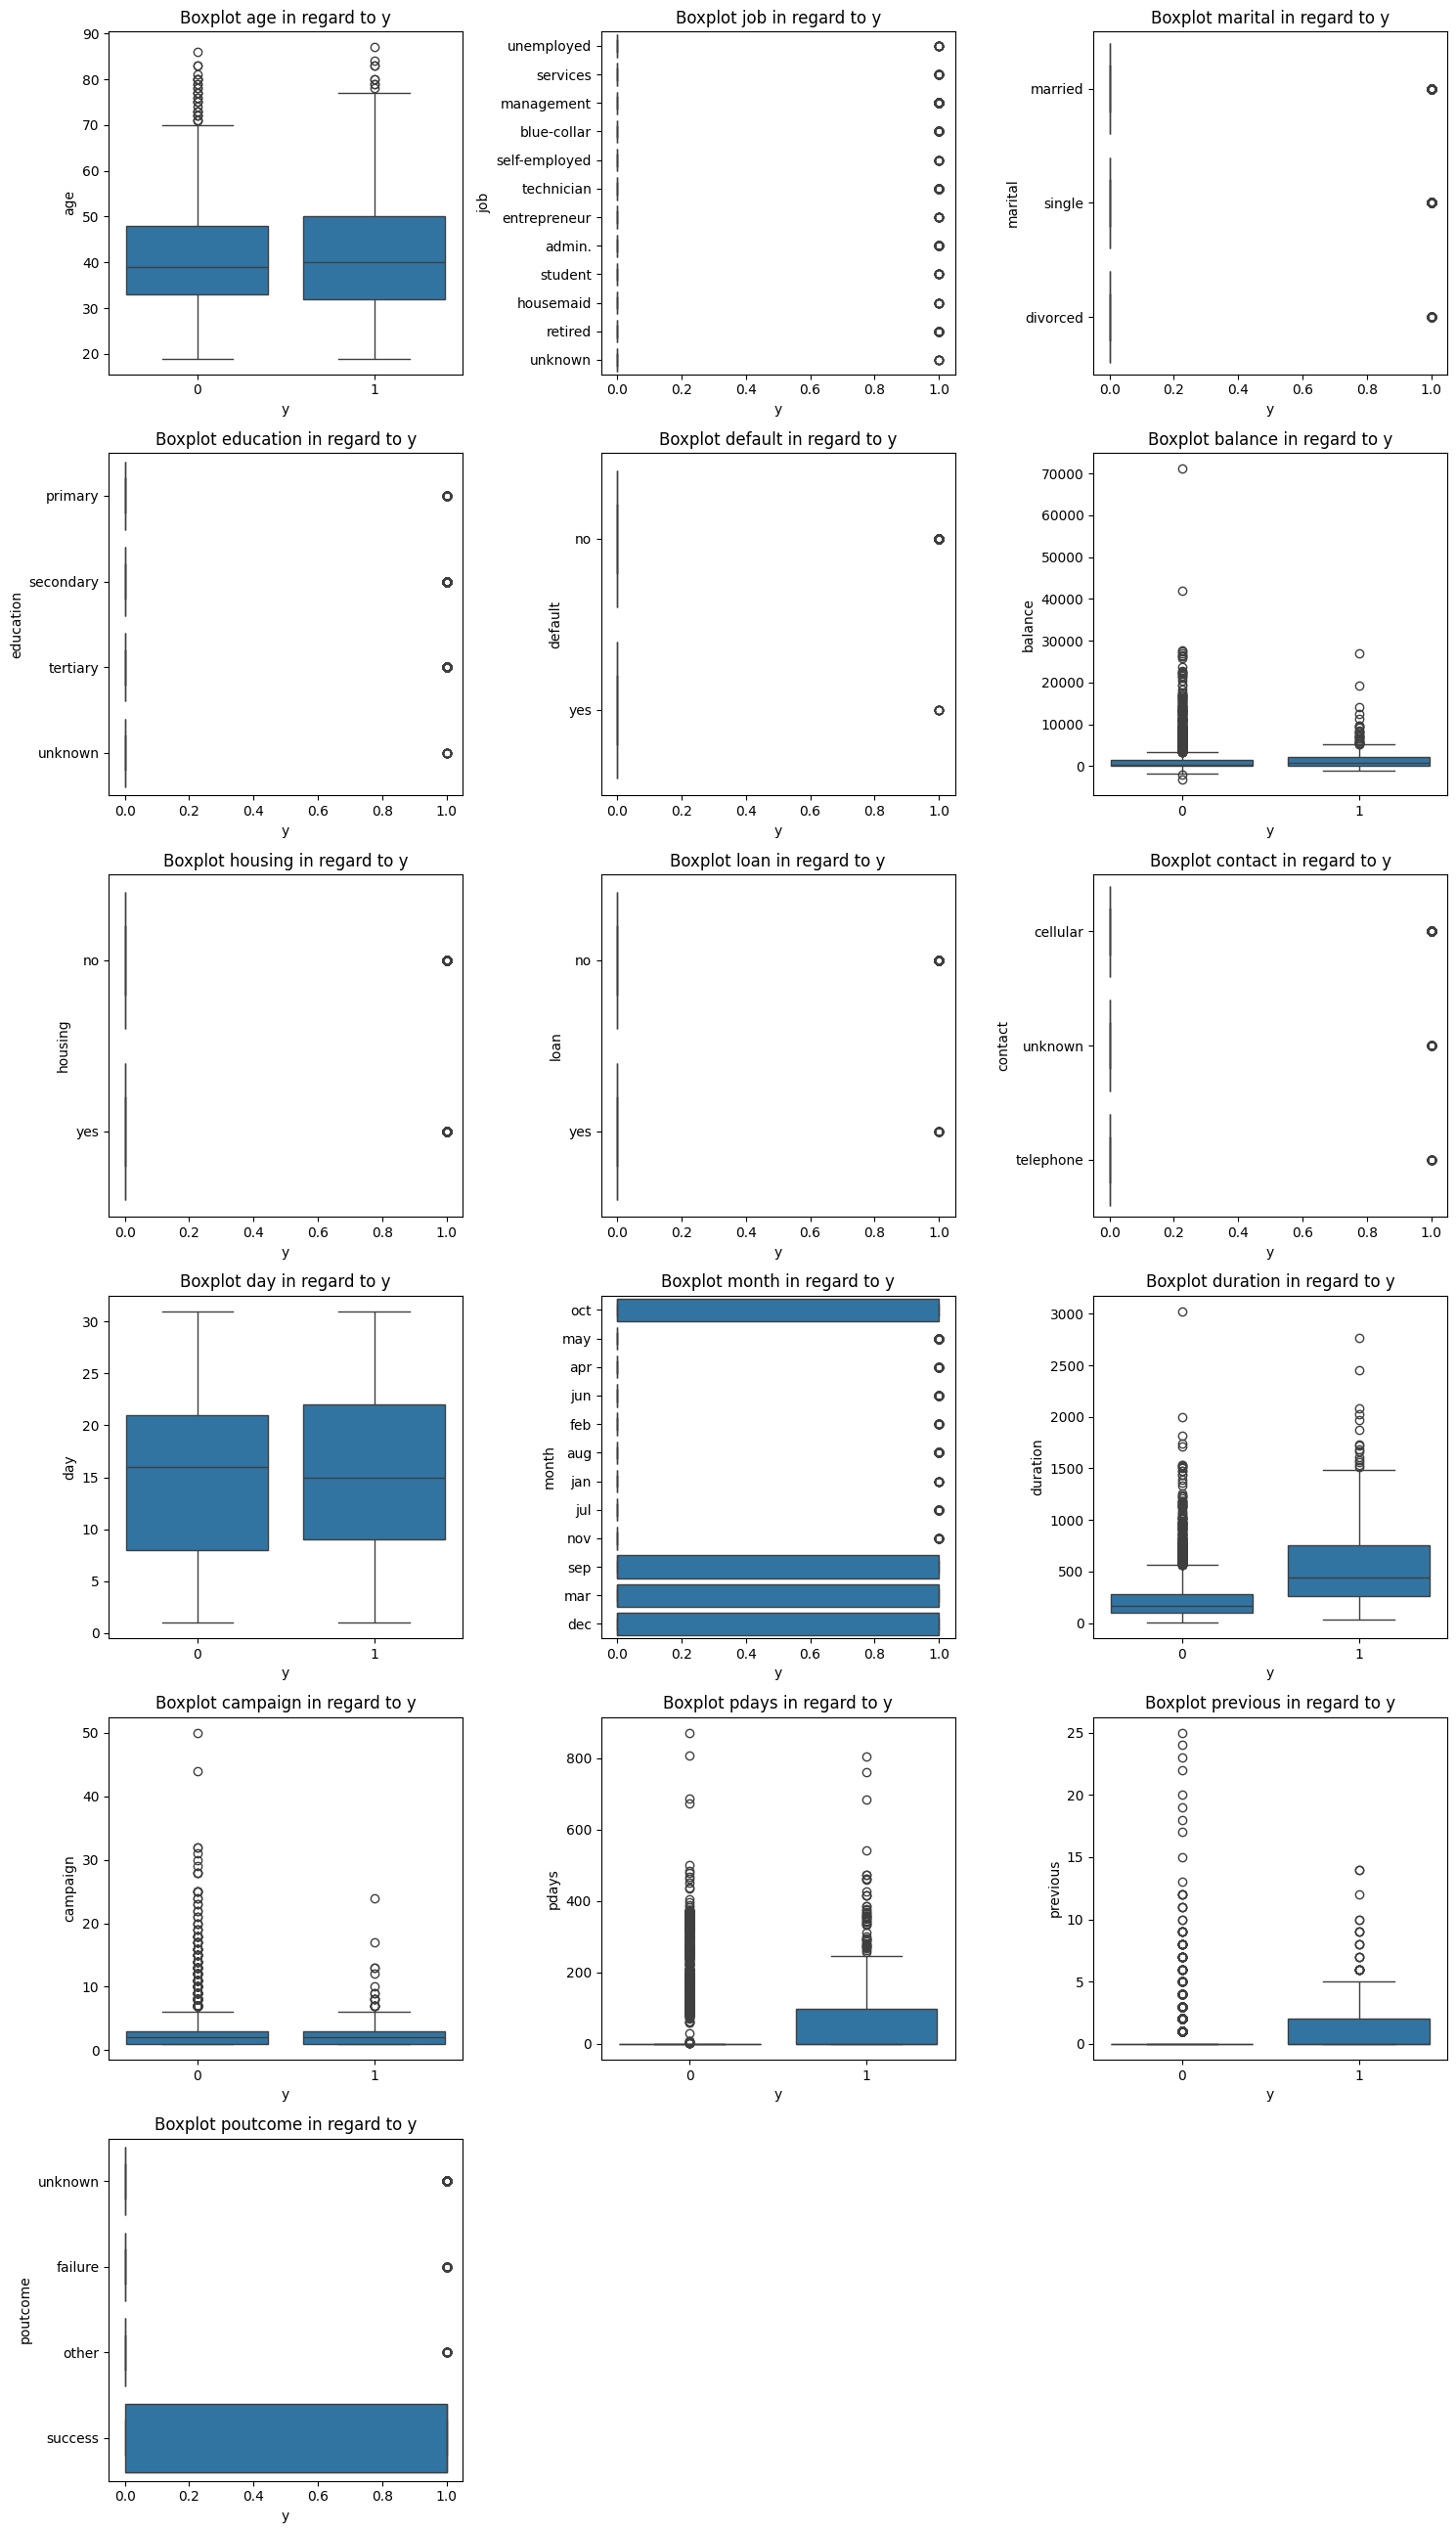

In [31]:
df_test.hist(bins=30, figsize=(15, 10))
plt.suptitle("Hist of distribution TEST", fontsize=16)
plt.show()

features = df_test.drop(columns=['y']).columns

plt.figure(figsize=(15, 5 * len(features) // 3))
for i, col in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    sns.boxplot(x="y", y=col, data=df_test)
    plt.title(f"Boxplot {col} in regard to y")

plt.tight_layout()
plt.show()

#4. Detecting Outliers, NaN

In [32]:
df_train.shape

(45211, 17)

In [33]:
df_test.shape

(4521, 17)

Now lets examine outliers

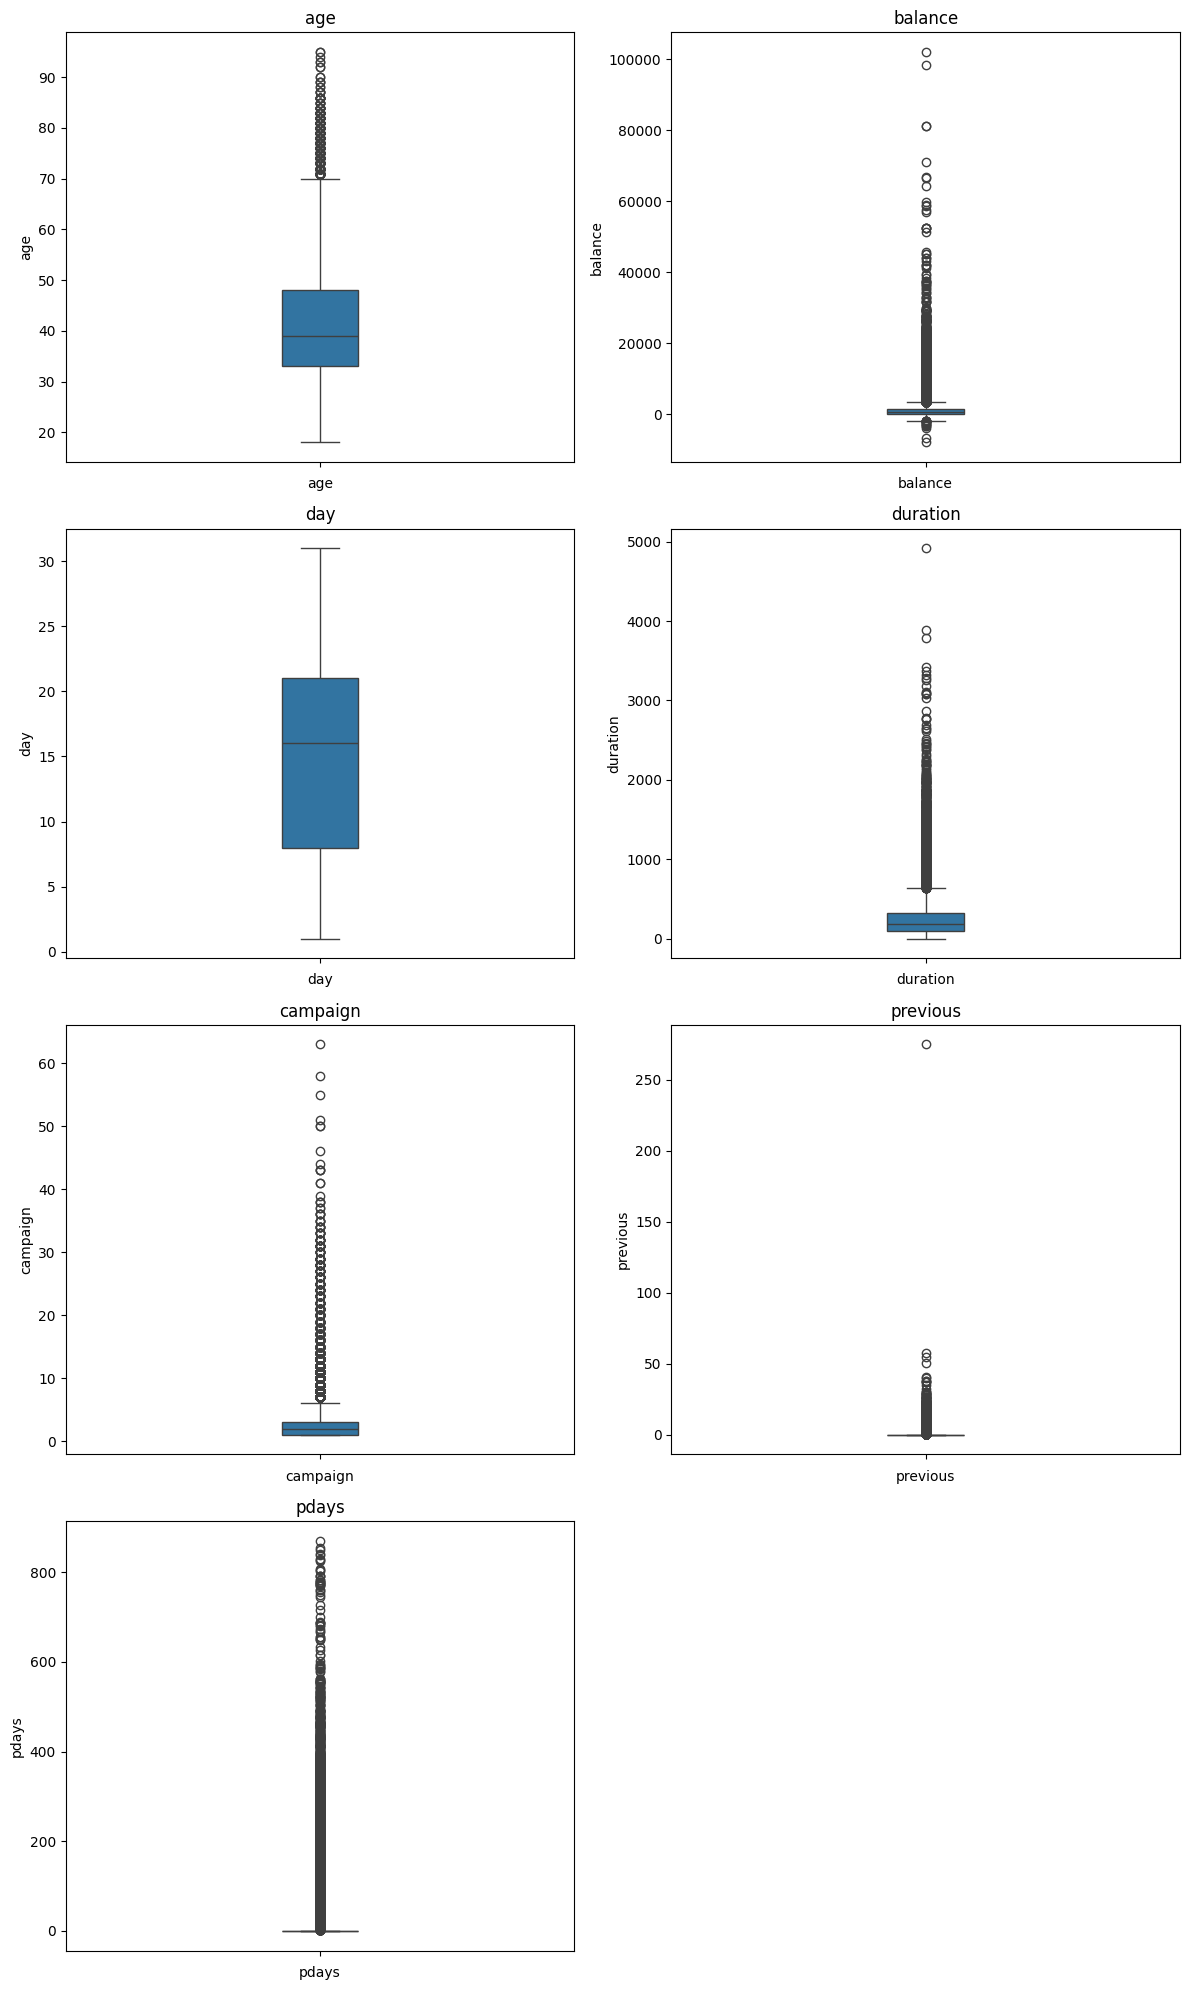

In [35]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays']
num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=df_train[feature], width=0.15)
    plt.title(f'{feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


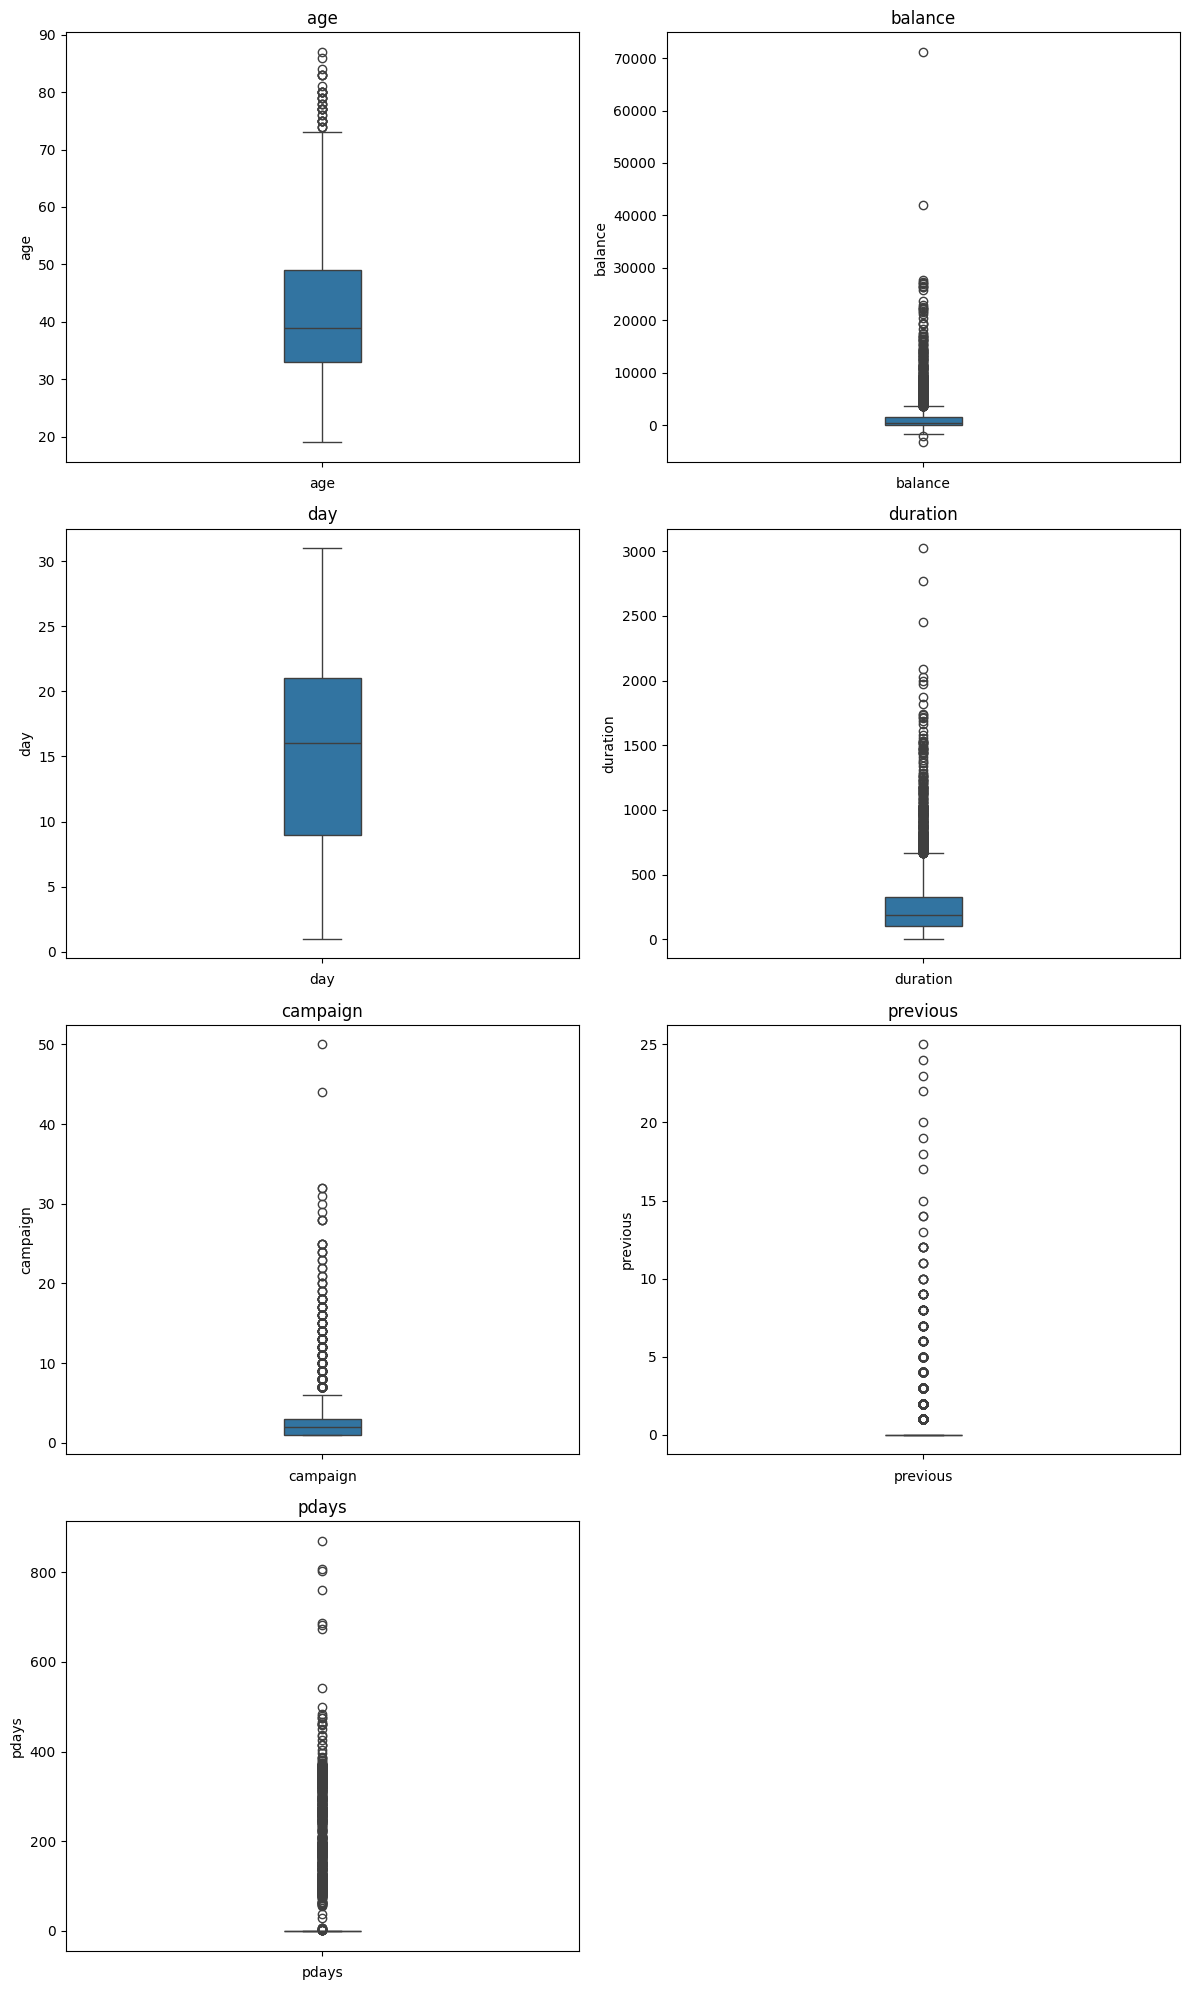

In [36]:
features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays']
num_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=df_test[feature], width=0.15)
    plt.title(f'{feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


All data is important:

- number of elderly people cannot be dropped;
- balance may vary, some hold much, others a little

Now lets examine NaN

1. Count how many -1 in pdays

In [37]:
(df_train['pdays'] == -1).sum(), (df_test['pdays'] == -1).sum()

(np.int64(36954), np.int64(3705))

2. Count 'unknown' in different columns

In [38]:
for col in df_train.columns:
    if 'unknown' in df_train[col].unique():
        count_unknown = (df_train[col] == 'unknown').sum()
        print(f"{col}: {count_unknown}")

job: 288
education: 1857
contact: 13020
poutcome: 36959


-1 or unknown take great part in dataset. Due to its nature, thats totally fine in terms of client information. We wont drop these


In [39]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [40]:
df_train.shape, df_test.shape

((45211, 17), (4521, 17))

#5. Further preparation of data: LabelEncoding

In [ ]:
# ENCODE ALL OBJECT DATA BEFORE MOVING ON

In [41]:
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [42]:
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19   oct        79         1     -1         0  unknown  0  
1  cellular   11   may       220         1    339         4  failure  0  
2  cellular   16   apr       185         1    330         1  failure  0  
3   unknown    3   jun       199         4     -1         0  unknown  0  
4   unknown    5   may       226         1     -1         0  unknown  0

In [43]:
to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
label_encoder = LabelEncoder()
for column in to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])

In [44]:
df_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1      0         0         3  0  
1    5      8       151         1      0         0         3  0  
2    5      8        76         1      0         0         3  0  
3    5      8        92         1      0         0         3  0  
4    5      8       198         1      0         0         3  0

In [45]:
df_test.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1      0         0         3  0  
1   11      8       220         1    336         4         0  0  
2   16      0       185         1    327         1         0  0  
3    3      6       199         4      0         0         3  0  
4    5      8       226         1      0         0         3  0

#6. Correlation between input and output

In [46]:
'''Extract numerical variables first.'''
num_merged = df_train.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1      0         0         3  0  
1    5      8       151         1      0         0         3  0  
2    5      8        76         1      0         0         3  0

**Name of numerical variables:**

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [47]:
corr_matrix = num_merged.corr()

corr_matrix['y'].sort_values(ascending=False)

y            1.000000
duration     0.394521
pdays        0.101449
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

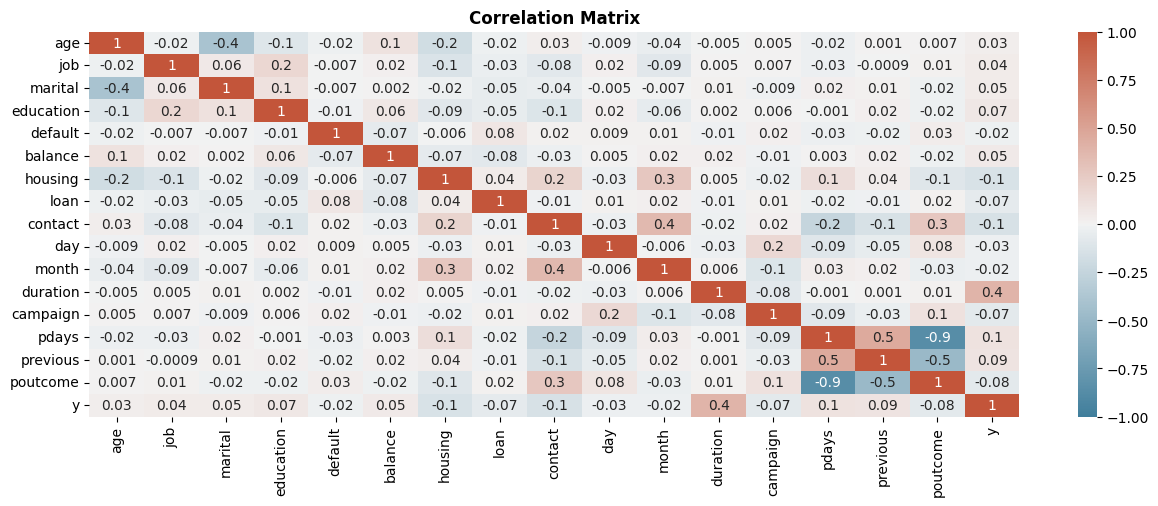

In [49]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 5))
sns.heatmap(num_merged.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [50]:
corr_matrix = num_merged.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)

negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 Series([], dtype: float64)

Less Correlated Pairs: 
 pdays     poutcome   -0.864747
poutcome  pdays      -0.864747
dtype: float64


In [51]:
df_corr = num_merged.corr()
bold('**Correlated Variables:**')
display(df_corr['y'].sort_values(ascending = False))

**Correlated Variables:**

y            1.000000
duration     0.394521
pdays        0.101449
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

In [52]:
# NOW FOR TEST

In [53]:
'''Extract numerical variables first.'''
num_merged = df_test.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1      0         0         3  0  
1   11      8       220         1    336         4         0  0  
2   16      0       185         1    327         1         0  0

**Name of numerical variables:**

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [54]:
corr_matrix = num_merged.corr()

corr_matrix['y'].sort_values(ascending=False)

y            1.000000
duration     0.401118
previous     0.116714
pdays        0.101390
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

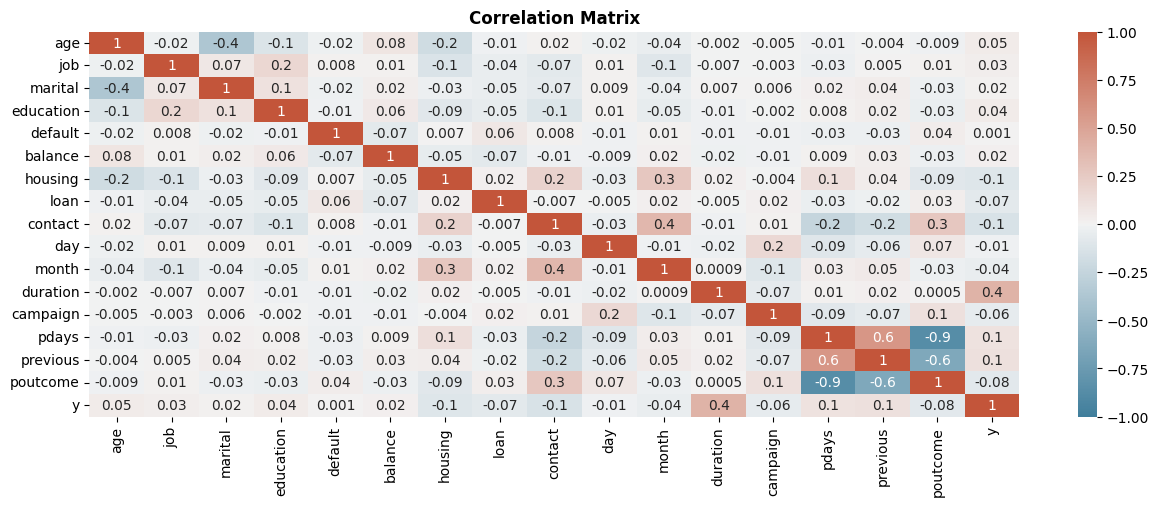

In [55]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 5))
sns.heatmap(num_merged.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [56]:
corr_matrix = num_merged.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)

negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 pdays     previous    0.581382
previous  pdays       0.581382
dtype: float64

Less Correlated Pairs: 
 pdays     poutcome   -0.867612
previous  poutcome   -0.636372
poutcome  pdays      -0.867612
          previous   -0.636372
dtype: float64


In [57]:
df_corr = num_merged.corr()
bold('**Correlated Variables:**')
display(df_corr['y'].sort_values(ascending = False))

**Correlated Variables:**

y            1.000000
duration     0.401118
previous     0.116714
pdays        0.101390
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

#7. Splitting data into TRAIN (90%) and TEST (10%) (they are already split)

In [58]:
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])
y_test = df_test['y']

In [59]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

# Model Training: Sklearn DecisionTree + graph - MAIN

In [60]:
# run basic model do get some score before tuning
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=3, max_features='sqrt')

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f'Accuracy of Decision Tree: {accuracy_dt:.8f}')


Accuracy of Decision Tree: 0.89006857


In [61]:
param_grid = {
    'max_depth': [2, 3, 4, 6, 8, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 15],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight':['balanced']
}

In [62]:
def evaluate_model(tree_class, params, X_train, y_train, X_val, y_val):
    params['random_state'] = 42
    model = tree_class(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

best_score_sklearn = -np.inf
best_params_sklearn = None

for max_depth in param_grid['max_depth']:
    for criterion in param_grid['criterion']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                  for class_weight in param_grid['class_weight']:
                      params = {
                          'max_depth': max_depth,
                          'criterion': criterion,
                          'min_samples_split': min_samples_split,
                          'min_samples_leaf': min_samples_leaf,
                          'max_features': max_features,
                          'class_weight': class_weight
                      }
                      score = evaluate_model(DecisionTreeClassifier, params, X_train, y_train, X_test, y_test)
                      if score > best_score_sklearn:
                          print(f"{score} - with params: {params}")
                          best_score_sklearn = score
                          best_params_sklearn = params

print("Sklearn Decision Tree - Best accuracy:", best_score_sklearn)
print("Sklearn Decision Tree - Best params:", best_params_sklearn)

0.6357000663570007 - with params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
0.7215217872152179 - with params: {'max_depth': 2, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced', 'random_state': 42}
0.7248396372483964 - with params: {'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
0.7732802477328025 - with params: {'max_depth': 4, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
0.807564698075647 - with params: {'max_depth': 4, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
0.827471798274718 - with params: {'max_depth': 8

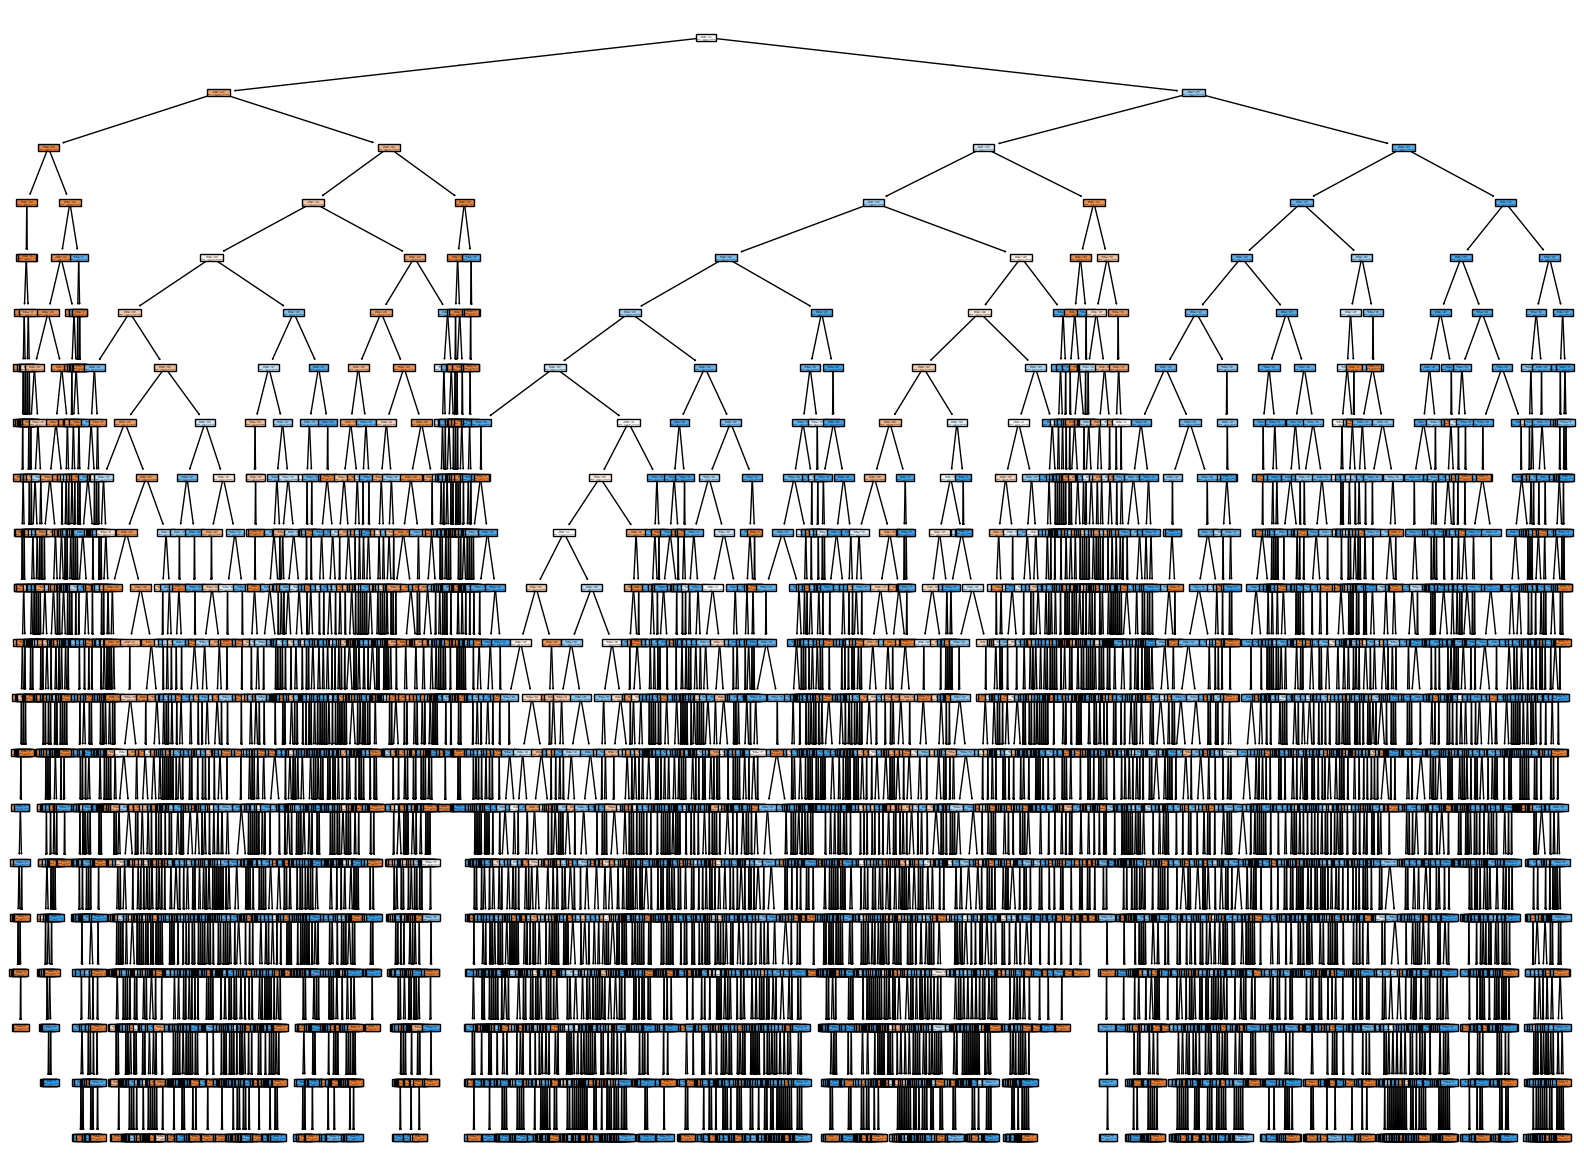

In [63]:
# Create a Decision Tree classifier with THE BEST PARAMETERS and fit it to the training data
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight='balanced')
clf.fit(X_train, y_train)

# Visualize the trained Decision Tree
plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str))
plt.show()

In [82]:
# get scores with best params
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight='balanced')
dt.fit(X_train, y_train)

y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

test_accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
train_accuracy_dt = accuracy_score(y_train, y_pred_dt_train)

print(f'Accuracy of Sklearn Decision Tree on Train: {train_accuracy_dt:.8f}')
print(f'Accuracy of Sklearn Decision Tree on Test: {test_accuracy_dt:.8f}')

Accuracy of Sklearn Decision Tree on Train: 0.96828206
Accuracy of Sklearn Decision Tree on Test: 0.96416722


In [83]:
print(y_test.to_numpy()[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [84]:
print(y_pred_dt_test[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [85]:
report = classification_report(y_test, y_pred_dt_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4000
           1       0.77      0.99      0.86       521

    accuracy                           0.96      4521
   macro avg       0.88      0.98      0.92      4521
weighted avg       0.97      0.96      0.97      4521



In [86]:
cf_matrix = confusion_matrix(y_test, y_pred_dt_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3841  159]
 [   3  518]]
True Positives (TP): 518
False Positives (FP): 159
True Negatives (TN): 3841
False Negatives (FN): 3


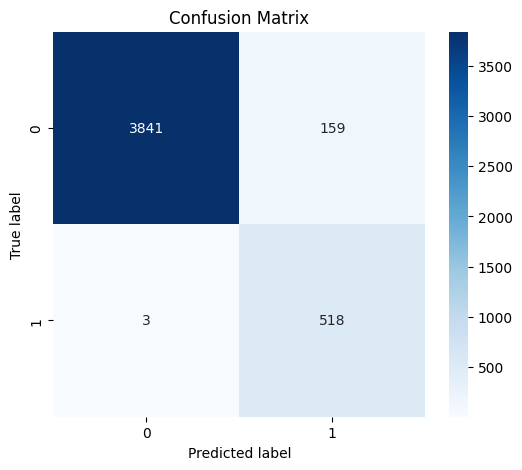

In [87]:
cm = confusion_matrix(y_test, y_pred_dt_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [89]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_dt_train))

print("TEST:\n", classification_report(y_test, y_pred_dt_test))

TRAIN:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     39922
           1       0.79      0.99      0.88      5289

    accuracy                           0.97     45211
   macro avg       0.89      0.98      0.93     45211
weighted avg       0.97      0.97      0.97     45211

TEST:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4000
           1       0.77      0.99      0.86       521

    accuracy                           0.96      4521
   macro avg       0.88      0.98      0.92      4521
weighted avg       0.97      0.96      0.97      4521



In [ ]:
#It does look like overfitting, but if we reduce max_depth, the precision for classifying 1 will reduce greatly.
# But if we give more than 20 depth - the model will increase its precision for class 1, which will indicate overfitting
# However, the classification for train and test are identical, which means the model works fine, so no need to give more depth in risk of overfitting.

# Model Training: Sklearn RandomForest - MAIN

In [91]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy of Random Forest: {accuracy_rf:.8f}')

Accuracy of Random Forest: 0.99447025


In [92]:
param_grid = {
    'n_estimators': [3, 5, 10, 50],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced']
}

In [93]:
def evaluate_model(forest_class, params, X_train, y_train, X_val, y_val):
    params['random_state'] = 42
    model = forest_class(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

best_score_rf = -np.inf
best_params_rf = None

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for criterion in param_grid['criterion']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                      for class_weight in param_grid['class_weight']:
                          params = {
                              'n_estimators': n_estimators,
                              'max_depth': max_depth,
                              'criterion': criterion,
                              'min_samples_split': min_samples_split,
                              'min_samples_leaf': min_samples_leaf,
                              'max_features': max_features,
                              'class_weight': class_weight
                          }
                          score = evaluate_model(RandomForestClassifier, params, X_train, y_train, X_test, y_test)
                          if score > best_score_rf:
                              print(f"{score} - with params: {params}")
                              best_score_rf = score
                              best_params_rf = params

print("Sklearn Random Forest - Best accuracy:", best_score_rf)
print("Sklearn Random Forest - Best params:", best_params_rf)


0.9796505197965052 - with params: {'n_estimators': 3, 'max_depth': None, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced', 'random_state': 42}
0.9871709798717098 - with params: {'n_estimators': 5, 'max_depth': None, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced', 'random_state': 42}
0.9878345498783455 - with params: {'n_estimators': 5, 'max_depth': None, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
0.9940278699402787 - with params: {'n_estimators': 10, 'max_depth': None, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced', 'random_state': 42}
0.9951338199513382 - with params: {'n_estimators': 10, 'max_depth': None, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max

KeyboardInterrupt: 

In [106]:
random_forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_depth=20, min_samples_split=2, criterion='entropy', max_features=None, random_state=42, class_weight='balanced')
random_forest.fit(X_train, y_train)

y_pred_rf_test = random_forest.predict(X_test)
y_pred_rf_train = random_forest.predict(X_train)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
train_accuracy_rf = accuracy_score(y_train, y_pred_rf_train)

print(f'Accuracy of Sklearn Random Forest on Train: {train_accuracy_rf:.8f}')
print(f'Accuracy of Sklearn Random Forest on Test: {test_accuracy_rf:.8f}')

Accuracy of Sklearn Random Forest on Train: 0.99559842
Accuracy of Sklearn Random Forest on Test: 0.99491263


In [107]:
print(y_test.to_numpy()[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [108]:
print(y_pred_rf_test[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [109]:
report = classification_report(y_test, y_pred_rf_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.96      0.99      0.98       521

    accuracy                           0.99      4521
   macro avg       0.98      0.99      0.99      4521
weighted avg       1.00      0.99      0.99      4521



In [110]:
cf_matrix = confusion_matrix(y_test, y_pred_rf_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3981   19]
 [   4  517]]
True Positives (TP): 517
False Positives (FP): 19
True Negatives (TN): 3981
False Negatives (FN): 4


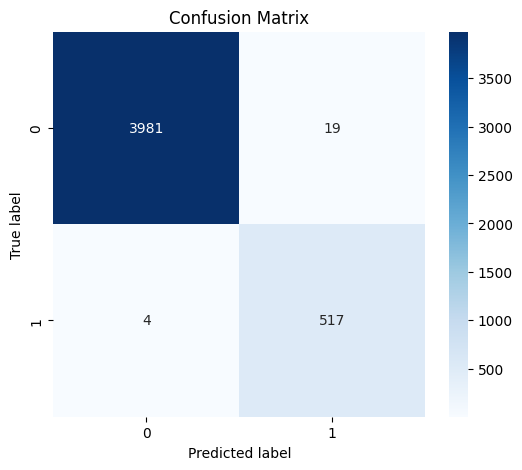

In [111]:
cm = confusion_matrix(y_test, y_pred_rf_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [112]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_rf_train))

print("TEST:\n", classification_report(y_test, y_pred_rf_test))

TRAIN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       0.97      0.99      0.98      5289

    accuracy                           1.00     45211
   macro avg       0.98      0.99      0.99     45211
weighted avg       1.00      1.00      1.00     45211

TEST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.96      0.99      0.98       521

    accuracy                           0.99      4521
   macro avg       0.98      0.99      0.99      4521
weighted avg       1.00      0.99      0.99      4521



In [ ]:
# no need to comment, randomforest did better because is ensemble of trees, could be overfitting but i dont think so.

# Model training: Sklearn KNN - MAIN

In [121]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy of kNN: {accuracy_knn:.8f}')

Accuracy of kNN: 0.93098872


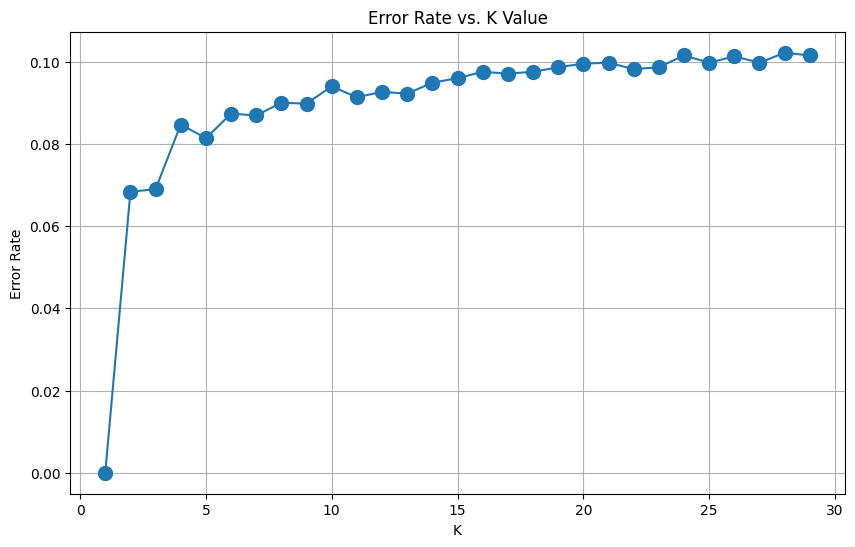

In [118]:
#Choosing right k
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [123]:
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]  # тільки для minkowski
}

def evaluate_knn(params, X_train, y_train, X_val, y_val):
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

best_score_knn = -np.inf
best_params_knn = None

for n_neighbors in param_grid_knn['n_neighbors']:
    for weights in param_grid_knn['weights']:
        for metric in param_grid_knn['metric']:
            if metric == 'minkowski':
                for p in param_grid_knn['p']:
                    params = {
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'metric': metric,
                        'p': p
                    }
                    score = evaluate_knn(params, X_train, y_train, X_test, y_test)
                    if score > best_score_knn:
                        print(f"{score:.4f} - with params: {params}")
                        best_score_knn = score
                        best_params_knn = params
            else:
                params = {
                    'n_neighbors': n_neighbors,
                    'weights': weights,
                    'metric': metric
                }
                score = evaluate_knn(params, X_train, y_train, X_test, y_test)
                if score > best_score_knn:
                    print(f"{score:.4f} - with params: {params}")
                    best_score_knn = score
                    best_params_knn = params

print("Sklearn kNN - Best accuracy:", best_score_knn)
print("Sklearn kNN - Best params:", best_params_knn)

0.9184 - with params: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'minkowski', 'p': 1}
0.9186 - with params: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'minkowski', 'p': 2}
1.0000 - with params: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski', 'p': 1}


KeyboardInterrupt: 

In [124]:
# best params
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=1)
knn.fit(X_train, y_train)

y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

test_accuracy_knn = accuracy_score(y_test, y_pred_knn_test)
train_accuracy_knn = accuracy_score(y_train, y_pred_knn_train)

print(f'Accuracy of kNN on Train: {train_accuracy_knn:.8f}')
print(f'Accuracy of kNN on Test: {test_accuracy_knn:.8f}')

Accuracy of kNN on Train: 1.00000000
Accuracy of kNN on Test: 1.00000000


In [125]:
print(y_test.to_numpy()[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [126]:
print(y_pred_knn_test[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [127]:
report = classification_report(y_test, y_pred_knn_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [128]:
cf_matrix = confusion_matrix(y_test, y_pred_knn_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[4000    0]
 [   0  521]]
True Positives (TP): 521
False Positives (FP): 0
True Negatives (TN): 4000
False Negatives (FN): 0


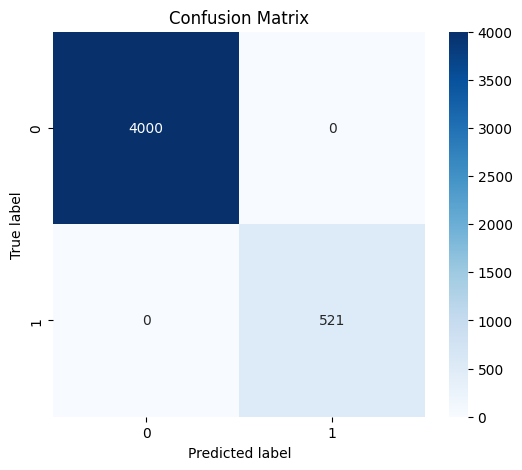

In [129]:
cm = confusion_matrix(y_test, y_pred_knn_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [130]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_knn_train))

print("TEST:\n", classification_report(y_test, y_pred_knn_test))

TRAIN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211

TEST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [ ]:
# overfitting????

In [134]:
X = pd.concat([X_train, X_test]) #~!!!!!!!!!!!!!!!!!!!!!!
y = pd.concat([y_train, y_test]) #~!!!!!!!!!!!!!!!!!!!!!!

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=1
)

scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print("Fold accuracy:", scores)
print("Average:", np.mean(scores))


Fold accuracy: [0.90017091 0.86739721 0.85903881 0.85682687 0.83832697]
Average: 0.8643521502491256


In [ ]:
#cross validation it bad because my dataset is already split and concat can create more problems

# Model Training: Sklearn SVM - MAIN

In [136]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of SVM: {accuracy_svm:.8f}')

Accuracy of SVM: 0.90754258


In [137]:
# good luck not to fall asleep while running this 🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃🙃
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

best_svm = grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of best SVM on test: {accuracy_svm:.8f}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best CV score: 0.8830151956773266
Accuracy of best SVM on test: 0.88476001


In [138]:
#use best parameters after grid search (its different from first run due to cross validation (probably))
svm = SVC(kernel='rbf', random_state=42, C=0.1, gamma=1)
svm.fit(X_train, y_train)

y_pred_svm_test = svm.predict(X_test)
y_pred_svm_train = svm.predict(X_train)

test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
train_accuracy_svm = accuracy_score(y_train, y_pred_svm_train)

print(f'Accuracy of SVM on Train: {train_accuracy_svm:.8f}')
print(f'Accuracy of SVM on Test: {test_accuracy_svm:.8f}')

Accuracy of SVM on Train: 0.88301520
Accuracy of SVM on Test: 0.88476001


In [145]:
print(y_test.to_numpy()[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [146]:
print(y_pred_svm_test[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [141]:
report = classification_report(y_test, y_pred_svm_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [142]:
cf_matrix = confusion_matrix(y_test, y_pred_svm_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[4000    0]
 [ 521    0]]
True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 4000
False Negatives (FN): 521


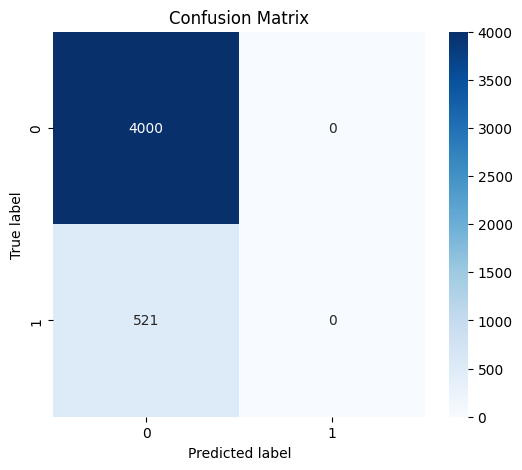

In [147]:
cm = confusion_matrix(y_test, y_pred_svm_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [148]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_svm_train))

print("TEST:\n", classification_report(y_test, y_pred_svm_test))

TRAIN:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211

TEST:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

In [ ]:
# THIS IS BAD. possibly due to RBF kernel

In [149]:
#use best parameters after grid search (its different from first run due to cross validation (probably))
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm_test = svm.predict(X_test)
y_pred_svm_train = svm.predict(X_train)

test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
train_accuracy_svm = accuracy_score(y_train, y_pred_svm_train)

print(f'Accuracy of SVM on Train: {train_accuracy_svm:.8f}')
print(f'Accuracy of SVM on Test: {test_accuracy_svm:.8f}')

Accuracy of SVM on Train: 0.90637234
Accuracy of SVM on Test: 0.90754258


In [150]:
print(y_test.to_numpy()[:200])
print(y_pred_svm_test[:200])

report = classification_report(y_test, y_pred_svm_test)
print(report)

cf_matrix = confusion_matrix(y_test, y_pred_svm_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.73      0.31      0.44       521

    accuracy          

In [ ]:
# default params are better, somehow, lets try different kernels

In [151]:
#use best parameters after grid search (its different from first run due to cross validation (probably))
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm_test = svm.predict(X_test)
y_pred_svm_train = svm.predict(X_train)

test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
train_accuracy_svm = accuracy_score(y_train, y_pred_svm_train)

print(f'Accuracy of SVM on Train: {train_accuracy_svm:.8f}')
print(f'Accuracy of SVM on Test: {test_accuracy_svm:.8f}')

Accuracy of SVM on Train: 0.89905112
Accuracy of SVM on Test: 0.89980093


In [152]:
print(y_test.to_numpy()[:200])
print(y_pred_svm_test[:200])

report = classification_report(y_test, y_pred_svm_test)
print(report)

cf_matrix = confusion_matrix(y_test, y_pred_svm_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      4000
           1       0.75      0.20      0.31       521

    accuracy          

In [ ]:
#at least i tried to use GridSearch, although it failed.

# Model Training: Sklearn AdaBoost - MAIN

In [155]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

y_pred_adb = adaboost.predict(X_test)

accuracy_adb = accuracy_score(y_test, y_pred_adb)

print(f'Accuracy of AdaBoost: {accuracy_adb:.8f}')

Accuracy of AdaBoost: 0.89294404


In [157]:
param_grid_adb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME']
}

def evaluate_adb(params, X_train, y_train, X_val, y_val):
    model = AdaBoostClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

best_score_adb = -np.inf
best_params_adb = None

for n_estimators in param_grid_adb['n_estimators']:
    for learning_rate in param_grid_adb['learning_rate']:
        for algorithm in param_grid_adb['algorithm']:
            params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': algorithm
            }
            score = evaluate_adb(params, X_train, y_train, X_test, y_test)
            if score > best_score_adb:
                print(f"{score:.4f} - with params: {params}")
                best_score_adb = score
                best_params_adb = params

print("AdaBoost - Best accuracy:", best_score_adb)
print("AdaBoost - Best params:", best_params_adb)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8848 - with params: {'n_estimators': 10, 'learning_rate': 0.01, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8910 - with params: {'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8929 - with params: {'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8932 - with params: {'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8938 - with params: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



0.8958 - with params: {'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



AdaBoost - Best accuracy: 0.8958195089581951
AdaBoost - Best params: {'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


In [172]:
adb = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, algorithm='SAMME', random_state=42)
adb.fit(X_train, y_train)

y_pred_adb_test = adb.predict(X_test)
y_pred_adb_train = adb.predict(X_train)

test_accuracy_adb = accuracy_score(y_test, y_pred_adb_test)
train_accuracy_adb = accuracy_score(y_train, y_pred_adb_train)

print(f'Accuracy of ADB on Train: {train_accuracy_adb:.8f}')
print(f'Accuracy of ADB on Test: {test_accuracy_adb:.8f}')

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



Accuracy of ADB on Train: 0.89666232
Accuracy of ADB on Test: 0.89581951


In [173]:
print(y_test.to_numpy()[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [174]:
print(y_pred_adb_test[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [161]:
report = classification_report(y_test, y_pred_adb_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.60      0.28      0.38       521

    accuracy                           0.90      4521
   macro avg       0.76      0.63      0.66      4521
weighted avg       0.88      0.90      0.88      4521



In [162]:
cf_matrix = confusion_matrix(y_test, y_pred_adb_test)
print("Confusion Matrix:\n", cf_matrix)

TN, FP, FN, TP = cf_matrix.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix:
 [[3903   97]
 [ 374  147]]
True Positives (TP): 147
False Positives (FP): 97
True Negatives (TN): 3903
False Negatives (FN): 374


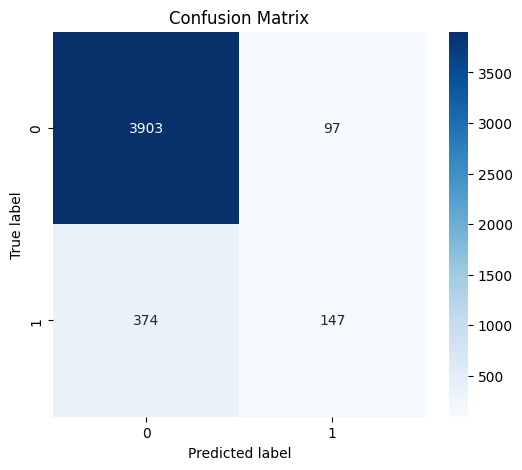

In [163]:
cm = confusion_matrix(y_test, y_pred_adb_test)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [164]:
from sklearn.metrics import classification_report

print("TRAIN:\n", classification_report(y_train, y_pred_adb_train))

print("TEST:\n", classification_report(y_test, y_pred_adb_test))

TRAIN:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.63      0.29      0.39      5289

    accuracy                           0.90     45211
   macro avg       0.77      0.63      0.67     45211
weighted avg       0.88      0.90      0.88     45211

TEST:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.60      0.28      0.38       521

    accuracy                           0.90      4521
   macro avg       0.76      0.63      0.66      4521
weighted avg       0.88      0.90      0.88      4521



In [ ]:
#although its accuracy is bad, at least its not overfitted

#quick start - MAIN

In [171]:
# 1. Preparation and analysis of chosen data
''' Read in the train and test datasets separately '''
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_deposit.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_deposit.csv")

# 2. Target encoding
label_encoder = LabelEncoder()
df_train['y'] = label_encoder.fit_transform(df_train['y'])
df_test['y'] = label_encoder.transform(df_test['y'])  # важливо: трансформуємо тією ж схемою

# 3. Detecting Outliers, NaN (для train і test окремо!)
def clean_dataset(df):
    # df.loc[df.pdays == -1, 'pdays'] = np.nan
    # col = ['job', 'education', 'contact', 'poutcome']
    # for column in col:
    #     df.replace({column: {'unknown': np.nan}}, inplace=True)
    # df.drop(['pdays','poutcome'] , inplace = True, axis = 1)
    df.loc[df['job'].isna() , 'job'] = df.job.value_counts().idxmax()
    df.loc[df['education'].isna() , 'education'] = df.education.value_counts().idxmax()
    df.loc[df.contact.isnull(), 'contact'] = df.contact.value_counts().idxmax()
    return df

df_train = clean_dataset(df_train)
df_test = clean_dataset(df_test)


# 4. Further preparation of data: LabelEncoding
to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
label_encoder = LabelEncoder()
for column in to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])

# 5. Split into X, y
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['y'])
y_test = df_test['y']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45211, 16) (4521, 16) (45211,) (4521,)
